In [105]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats




In [107]:
# Universal Sentence Encoder'ı yükle
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(module_url)

# Sentence-Transformers modellerini yükle
st_model = SentenceTransformer('stsb-roberta-large')
st_model2 = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')


ValueError: Trying to load a model of incompatible/unknown type. '/var/folders/x_/bs8y0fh51s3gd_v5rgkxdzf40000gn/T/tfhub_modules/063d866c06683311b44b4992fd46003be952409c' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

In [103]:
module_url = "./universal-sentence-encoder_4"
#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

#Bert Models
from sentence_transformers import SentenceTransformer,util
tmodel = SentenceTransformer('stsb-roberta-large')
tmodel2 = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

IndexError: Read less bytes than requested

In [29]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [30]:
examQ1 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q1')
examQ1.fillna('', inplace=True)
examQ1.head()
answersQ1 = examQ1.iloc[:,2].values.tolist()
originalgrades = examQ1.iloc[:,5].values.tolist()
sentence_embeddings = model(answersQ1)
query = 'Different physical features of compounds with the same chemical composition are due to differences in their molecular arrangement or structure, which affect intermolecular forces and crystal structures.'
query_vec = model([query])[0]
data = []



studentnoq1 = examQ1.iloc[:,0].values.tolist()
stno = []

for no in studentnoq1:
  stno.append(str(no))


for sent in answersQ1:
  sim = cosine(query_vec, model([sent])[0])
  grade = sim*20
  if grade<0:
    grade = 0    
  data.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim)

""" plt.figure(figsize=(20,20))
plt.plot(data, stno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

gradesdf = pd.DataFrame({'Encoder':data,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(gradesdf)) :
  print(stno[i],gradesdf.loc[i, "Encoder"], gradesdf.loc[i, "Original"])
print(gradesdf.corr())

#sns.heatmap(gradesdf.corr())
#R-Squared
r2 = r2_score(originalgrades,data)
print("R2: ",r2)
print("T-Test Result: ",stats.ttest_ind(originalgrades,data))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(gradesdf)


Sentence =  nuclears theory  3D structure cube added or removed atoms  ; similarity =  0.32545024
Sentence =  Because of count of elements. Mostly about carbon dioxide. ; similarity =  0.14440154
Sentence =  Allotrops such as diamond and graphit they have the same chemical composition but they have a different type of crystal structures. ; similarity =  0.6323925
Sentence =  this name is izonom or isonome this caused from difference connection type of atoms and if is it dipol. ; similarity =  0.23569992
Sentence =  because of elements energy and pyhsical features has different reaction for every composition ; similarity =  0.41865116
Sentence =  for example water  and ice. both materials are same chemical composition =H2O but physical features are compelety different.and there is bağ .and  this determine  ice or water but i couldnt remember.the diffrence is heat   ; similarity =  0.47817796
Sentence =  Weather and temparature. Because fruit flies' genetics are easily effected affected 

**Roberta Large**

In [31]:
examQ1 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q1')
examQ1.fillna('', inplace=True)
examQ1.head()
answersQ1 = examQ1.iloc[:,2].values.tolist()
originalgrades = examQ1.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery = 'Different physical features of compounds with the same chemical composition are due to differences in their molecular arrangement or structure, which affect intermolecular forces and crystal structures.'
tquery_vec = tmodel.encode(([tquery])[0])
tdata = []



tstudentnoq1 = examQ1.iloc[:,0].values.tolist()
tstno = []

for no in tstudentnoq1:
  tstno.append(str(no))


for sent in answersQ1:
  tsim = cosine(tquery_vec, tmodel.encode(([sent])[0]))
  tgrade = tsim*20
  if tgrade<0:
    tgrade = 0    
  tdata.append(round(tgrade))
  print("Sentence = ", sent, "; similarity = ", tsim)

""" plt.figure(figsize=(20,20))
plt.plot(tdata, tstno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

tgradesdf = pd.DataFrame({'Encoder':tdata,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf)) :
  print(tstno[i],tgradesdf.loc[i, "Encoder"], tgradesdf.loc[i, "Original"])
print(tgradesdf.corr())

#sns.heatmap(tgradesdf.corr())
#R-Squared
tr2 = r2_score(originalgrades,tdata)
print("R2: ",tr2)
print("T-Test Result: ",stats.ttest_ind(originalgrades,tdata))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf)


Sentence =  nuclears theory  3D structure cube added or removed atoms  ; similarity =  0.48503464
Sentence =  Because of count of elements. Mostly about carbon dioxide. ; similarity =  0.37391126
Sentence =  Allotrops such as diamond and graphit they have the same chemical composition but they have a different type of crystal structures. ; similarity =  0.58305156
Sentence =  this name is izonom or isonome this caused from difference connection type of atoms and if is it dipol. ; similarity =  0.57467866
Sentence =  because of elements energy and pyhsical features has different reaction for every composition ; similarity =  0.47022042
Sentence =  for example water  and ice. both materials are same chemical composition =H2O but physical features are compelety different.and there is bağ .and  this determine  ice or water but i couldnt remember.the diffrence is heat   ; similarity =  0.40833443
Sentence =  Weather and temparature. Because fruit flies' genetics are easily effected affected

**Bert Base Nli**

In [32]:
examQ1 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q1')
examQ1.fillna('', inplace=True)
examQ1.head()
answersQ1 = examQ1.iloc[:,2].values.tolist()
originalgrades = examQ1.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query = 'Different physical features of compounds with the same chemical composition are due to differences in their molecular arrangement or structure, which affect intermolecular forces and crystal structures.'
t2query_vec = tmodel2.encode(([t2query])[0])
t2data = []



t2studentnoq1 = examQ1.iloc[:,0].values.tolist()
t2stno = []

for no in t2studentnoq1:
  t2stno.append(str(no))


for sent in answersQ1:
  t2sim = cosine(t2query_vec, tmodel2.encode(([sent])[0]))
  t2grade = t2sim*20
  if t2grade<0:
    t2grade = 0    
  t2data.append(round(t2grade))
  print("Sentence = ", sent, "; similarity = ", t2sim)

""" plt.figure(figsize=(20,20))
plt.plot(t2data, t2stno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
 """
t2gradesdf = pd.DataFrame({'Encoder':t2data,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf)) :
  print(t2stno[i],t2gradesdf.loc[i, "Encoder"], t2gradesdf.loc[i, "Original"])
print(t2gradesdf.corr())

#sns.heatmap(t2gradesdf.corr())
#R-Squared
t2r2 = r2_score(originalgrades,t2data)
print("R2: ",t2r2)
print("T-Test Result: ",stats.ttest_ind(originalgrades,t2data))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf)


Sentence =  nuclears theory  3D structure cube added or removed atoms  ; similarity =  0.54131776
Sentence =  Because of count of elements. Mostly about carbon dioxide. ; similarity =  0.42155027
Sentence =  Allotrops such as diamond and graphit they have the same chemical composition but they have a different type of crystal structures. ; similarity =  0.70099866
Sentence =  this name is izonom or isonome this caused from difference connection type of atoms and if is it dipol. ; similarity =  0.6845141
Sentence =  because of elements energy and pyhsical features has different reaction for every composition ; similarity =  0.73950994
Sentence =  for example water  and ice. both materials are same chemical composition =H2O but physical features are compelety different.and there is bağ .and  this determine  ice or water but i couldnt remember.the diffrence is heat   ; similarity =  0.6126296
Sentence =  Weather and temparature. Because fruit flies' genetics are easily effected affected b

**Q2**

In [33]:
examQ2 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q2')
examQ2.fillna('', inplace=True)
examQ2.head()
answersQ2 = examQ2.iloc[:,2].values.tolist()
studentnoq2 = examQ2.iloc[:,0].values.tolist()
stno2 = []
originalgrades2 = examQ2.iloc[:,5].values.tolist()
for no in studentnoq2:
  stno2.append(str(no))
#print(answersQ1)

sentence_embeddings = model(answersQ2)
query2 = 'Sensitive and Accurate measurements can be made with Gases in Reaction. Gases are also easy to capture and observe. You could get numbers using the PV=nRT Equation.'
query_vec2 = model([query2])[0]
data2=[]
for sent in answersQ2:
  sim2 = cosine(query_vec2, model([sent])[0])
  grade = sim2*20
  if grade<0:
    grade = 0
  data2.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim2)

""" plt.figure(figsize=(20,20))
plt.plot(data2, stno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

grades2df = pd.DataFrame({'Encoder':data2,'Original':originalgrades2})
print("Number:    Encoder:    Original")
for i in range(len(grades2df)) :
  print(stno2[i],grades2df.loc[i, "Encoder"], grades2df.loc[i, "Original"])
print(grades2df.corr())

#sns.heatmap(grades2df.corr())

r22 = r2_score(originalgrades2,data2)
print("R2: ",r22)

print("T-Test Result: ",stats.ttest_ind(originalgrades2,data2))

"""
cf_matrix2 = confusion_matrix(data2,originalgrades2)
print(cf_matrix2)
sns.heatmap(cf_matrix2,annot=True)
"""

Sentence =  Because ,volume,weight, size calculasion in the air more easy ; similarity =  0.12534973
Sentence =  It allowed that measurement of gas with Analytical Balance. Weight, volume, pressure and templature was quantifiable now. ; similarity =  0.49234748
Sentence =  Observing gases are more easy than the others . Also with the barometer and such tools we can measure its volume , pressure and the output of some reactions volume . Basically gases are more effective than the others.
 ; similarity =  0.68224925
Sentence =  because of the easly working on gases. they can expand or change the volume. they doing a vacuum tube in the liquid when some reactions occured they can observe with liqud volume in tube. ; similarity =  0.38379526
Sentence =  because its easy to calculate the everything and this time gas is important ; similarity =  0.335927
Sentence =  P.V=n.R.T   with this formula we can figure out gases exacly .gases are pressable.and heat effects it. and gases have P.  which 

'\ncf_matrix2 = confusion_matrix(data2,originalgrades2)\nprint(cf_matrix2)\nsns.heatmap(cf_matrix2,annot=True)\n'

**Roberta Large**

In [34]:
examQ2 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q2')
examQ2.fillna('', inplace=True)
examQ2.head()
answersQ2 = examQ2.iloc[:,2].values.tolist()
originalgrades2 = examQ2.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery2 = 'Sensitive and Accurate measurements can be made with Gases in Reaction. Gases are also easy to capture and observe. You could get numbers using the PV=nRT Equation.'
tquery_vec2 = tmodel.encode(([tquery2])[0])
tdata2 = []



tstudentnoq2 = examQ2.iloc[:,0].values.tolist()
tstno2 = []

for no in tstudentnoq2:
  tstno2.append(str(no))


for sent in answersQ2:
  tsim2 = cosine(tquery_vec2, tmodel.encode(([sent])[0]))
  tgrade2 = tsim2*20
  if tgrade2<0:
    tgrade2 = 0    
  tdata2.append(round(tgrade2))
  print("Sentence = ", sent, "; similarity = ", tsim2)

""" plt.figure(figsize=(20,20))
plt.plot(tdata2, tstno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

tgradesdf2 = pd.DataFrame({'Encoder':tdata2,'Original':originalgrades2})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf2)) :
  print(tstno2[i],tgradesdf2.loc[i, "Encoder"], tgradesdf2.loc[i, "Original"])
print(tgradesdf2.corr())

#sns.heatmap(tgradesdf2.corr())
#R-Squared
tr22 = r2_score(originalgrades2,tdata2)
print("R2: ",tr22)
print("T-Test Result: ",stats.ttest_ind(originalgrades2,tdata2))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf2)


Sentence =  Because ,volume,weight, size calculasion in the air more easy ; similarity =  0.5289426
Sentence =  It allowed that measurement of gas with Analytical Balance. Weight, volume, pressure and templature was quantifiable now. ; similarity =  0.60154593
Sentence =  Observing gases are more easy than the others . Also with the barometer and such tools we can measure its volume , pressure and the output of some reactions volume . Basically gases are more effective than the others.
 ; similarity =  0.7953815
Sentence =  because of the easly working on gases. they can expand or change the volume. they doing a vacuum tube in the liquid when some reactions occured they can observe with liqud volume in tube. ; similarity =  0.6896912
Sentence =  because its easy to calculate the everything and this time gas is important ; similarity =  0.69230825
Sentence =  P.V=n.R.T   with this formula we can figure out gases exacly .gases are pressable.and heat effects it. and gases have P.  which m

**Bert Base**

In [35]:
examQ2 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q2')
examQ2.fillna('', inplace=True)
examQ2.head()
answersQ2 = examQ2.iloc[:,2].values.tolist()
originalgrades2 = examQ2.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query2 = 'Sensitive and Accurate measurements can be made with Gases in Reaction. Gases are also easy to capture and observe. You could get numbers using the PV=nRT Equation.'
t2query_vec2 = tmodel2.encode(([t2query2])[0])
t2data2 = []



t2studentnoq2 = examQ2.iloc[:,0].values.tolist()
t2stno2 = []

for no in t2studentnoq2:
  t2stno2.append(str(no))


for sent in answersQ2:
  t2sim2 = cosine(t2query_vec2, tmodel2.encode(([sent])[0]))
  t2grade2 = t2sim2*20
  if t2grade2<0:
    t2grade2 = 0    
  t2data2.append(round(t2grade2))
  print("Sentence = ", sent, "; similarity = ", t2sim2)

""" plt.figure(figsize=(20,20))
plt.plot(t2data2, t2stno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

t2gradesdf2 = pd.DataFrame({'Encoder':t2data2,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf2)) :
  print(t2stno2[i],t2gradesdf2.loc[i, "Encoder"], t2gradesdf2.loc[i, "Original"])
print(t2gradesdf2.corr())

#sns.heatmap(t2gradesdf2.corr())
#R-Squared
t2r22 = r2_score(originalgrades2,t2data2)
print("R2: ",t2r22)
print("T-Test Result: ",stats.ttest_ind(originalgrades2,t2data2))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf2)

Sentence =  Because ,volume,weight, size calculasion in the air more easy ; similarity =  0.675618
Sentence =  It allowed that measurement of gas with Analytical Balance. Weight, volume, pressure and templature was quantifiable now. ; similarity =  0.7121795
Sentence =  Observing gases are more easy than the others . Also with the barometer and such tools we can measure its volume , pressure and the output of some reactions volume . Basically gases are more effective than the others.
 ; similarity =  0.8469935
Sentence =  because of the easly working on gases. they can expand or change the volume. they doing a vacuum tube in the liquid when some reactions occured they can observe with liqud volume in tube. ; similarity =  0.6846482
Sentence =  because its easy to calculate the everything and this time gas is important ; similarity =  0.79455674
Sentence =  P.V=n.R.T   with this formula we can figure out gases exacly .gases are pressable.and heat effects it. and gases have P.  which mea

**Q3**

Sentence =  because can division easly
that atoms is control other atoms ; similarity =  0.13228154
Sentence =  Because of Fruit Fly has nearly same genetics like humans. Because of similarity of genetics, he studied on Fruit Fly.  ; similarity =  0.64172006
Sentence =  Morgan choose fruit flies because they have a short life cycle . They grow fast and also dies fast. ; similarity =  0.4341209
Sentence =  morgan choose fruit fly because of their lifetime is just 30 days. And their make too much eggs so population rapidly increasing. and it cost's is acceptable. ; similarity =  0.2956634
Sentence =  he want to cahnge something and because fruit fly dont take polen out of the flower and you can see the changing of genetics. you can calculate genetics code ; similarity =  0.50376385
Sentence =  awards always motivatite people .because when you do stuff and someone appreaciate you .that feels really good .and  the thing that youdone  ,your spending time worth it with awards. in this case M

'\ncf_matrix3 = confusion_matrix(data3,originalgrades3)\nprint(cf_matrix3)\nsns.heatmap(cf_matrix3,annot=True)\n'

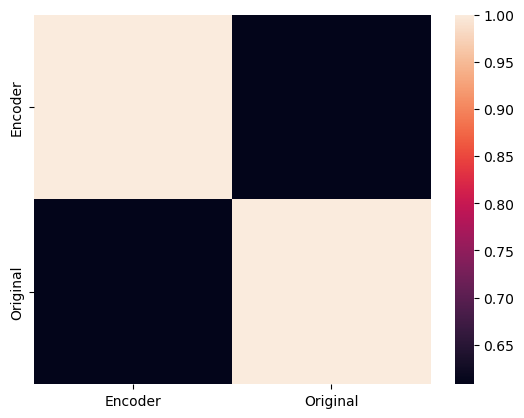

In [36]:
examQ3 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q3')
examQ3.fillna('', inplace=True)
examQ3.head()
answersQ3 = examQ3.iloc[:,2].values.tolist()

studentnoq3 = examQ3.iloc[:,0].values.tolist()
stno3 = []

for no in studentnoq3:
  stno3.append(str(no))
#print(answersQ1)
originalgrades3 = examQ3.iloc[:,5].values.tolist()
sentence_embeddings3 = model(answersQ3)
query3 = "Morgan chose the common fruit fly, Drosophila melanogaster, as a model organism to study genetics because fruit flies have a short life cycle, reproduce quickly and in large numbers, and have easily observable physical traits that can be used to study genetic inheritance. His motivation was to understand the basic principles of inheritance and the role of genes in determining physical traits, which he believed could help explain the mechanisms of evolution and human genetics."
query_vec3 = model([query3])[0]
data3 = []
for sent in answersQ3:
  sim3 = cosine(query_vec3, model([sent])[0])
  grade = sim3*20
  if grade<0:
    grade = 0
  data3.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim3)

""" plt.figure(figsize=(20,20))
plt.plot(data3, stno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

grades3df = pd.DataFrame({'Encoder':data3,'Original':originalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(grades3df)) :
  print(stno3[i],grades3df.loc[i, "Encoder"], grades3df.loc[i, "Original"])
print(grades3df.corr())

sns.heatmap(grades3df.corr())
r23 = r2_score(originalgrades3,data3)
print("R2: ",r23)
print("T-Test Result: ",stats.ttest_ind(originalgrades3,data3))
"""
cf_matrix3 = confusion_matrix(data3,originalgrades3)
print(cf_matrix3)
sns.heatmap(cf_matrix3,annot=True)
"""

**Roberta Large**

Sentence =  because can division easly
that atoms is control other atoms ; similarity =  0.37646842
Sentence =  Because of Fruit Fly has nearly same genetics like humans. Because of similarity of genetics, he studied on Fruit Fly.  ; similarity =  0.7488999
Sentence =  Morgan choose fruit flies because they have a short life cycle . They grow fast and also dies fast. ; similarity =  0.6768708
Sentence =  morgan choose fruit fly because of their lifetime is just 30 days. And their make too much eggs so population rapidly increasing. and it cost's is acceptable. ; similarity =  0.5369876
Sentence =  he want to cahnge something and because fruit fly dont take polen out of the flower and you can see the changing of genetics. you can calculate genetics code ; similarity =  0.6907485
Sentence =  awards always motivatite people .because when you do stuff and someone appreaciate you .that feels really good .and  the thing that youdone  ,your spending time worth it with awards. in this case Mor

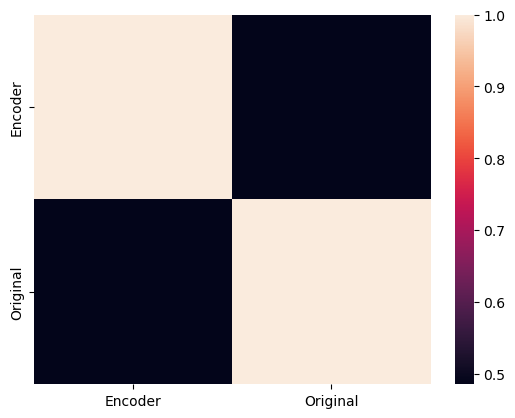

In [37]:
examQ3 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q3')
examQ3.fillna('', inplace=True)
examQ3.head()
answersQ3 = examQ3.iloc[:,2].values.tolist()
originalgrades3 = examQ3.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery3 = "Morgan chose the common fruit fly, Drosophila melanogaster, as a model organism to study genetics because fruit flies have a short life cycle, reproduce quickly and in large numbers, and have easily observable physical traits that can be used to study genetic inheritance. His motivation was to understand the basic principles of inheritance and the role of genes in determining physical traits, which he believed could help explain the mechanisms of evolution and human genetics."
tquery_vec3 = tmodel.encode(([tquery3])[0])
tdata3 = []



tstudentnoq3 = examQ3.iloc[:,0].values.tolist()
tstno3 = []

for no in tstudentnoq3:
  tstno3.append(str(no))


for sent in answersQ3:
  tsim3 = cosine(tquery_vec3, tmodel.encode(([sent])[0]))
  tgrade3 = tsim3*20
  if tgrade3<0:
    tgrade3 = 0    
  tdata3.append(round(tgrade3))
  print("Sentence = ", sent, "; similarity = ", tsim3)

""" plt.figure(figsize=(20,20))
plt.plot(tdata3, tstno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

tgradesdf3 = pd.DataFrame({'Encoder':tdata3,'Original':originalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf3)) :
  print(tstno3[i],tgradesdf3.loc[i, "Encoder"], tgradesdf3.loc[i, "Original"])
print(tgradesdf3.corr())

sns.heatmap(tgradesdf3.corr())
#R-Squared
tr23 = r2_score(originalgrades3,tdata3)
print("R2: ",tr22)
print("T-Test Result: ",stats.ttest_ind(originalgrades3,tdata3))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf3)

**Bert Base**

In [38]:
examQ3 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q3')
examQ3.fillna('', inplace=True)
examQ3.head()
answersQ3 = examQ3.iloc[:,2].values.tolist()
originalgrades3 = examQ3.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query3 = "Morgan chose the common fruit fly, Drosophila melanogaster, as a model organism to study genetics because fruit flies have a short life cycle, reproduce quickly and in large numbers, and have easily observable physical traits that can be used to study genetic inheritance. His motivation was to understand the basic principles of inheritance and the role of genes in determining physical traits, which he believed could help explain the mechanisms of evolution and human genetics."
t2query_vec3 = tmodel2.encode(([t2query3])[0])
t2data3 = []



t2studentnoq3 = examQ3.iloc[:,0].values.tolist()
t2stno3 = []

for no in t2studentnoq3:
  t2stno3.append(str(no))


for sent in answersQ3:
  t2sim3 = cosine(t2query_vec3, tmodel2.encode(([sent])[0]))
  t2grade3 = t2sim3*20
  if t2grade3<0:
    t2grade3 = 0    
  t2data3.append(round(t2grade3))
  print("Sentence = ", sent, "; similarity = ", t2sim3)
""" 
plt.figure(figsize=(20,20))
plt.plot(t2data3, t2stno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
 """
t2gradesdf3 = pd.DataFrame({'Encoder':t2data3,'Original':originalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf3)) :
  print(t2stno3[i],t2gradesdf3.loc[i, "Encoder"], t2gradesdf3.loc[i, "Original"])
print(t2gradesdf3.corr())

#sns.heatmap(t2gradesdf3.corr())
#R-Squared
t2r23 = r2_score(originalgrades3,t2data3)
print("R2: ",t2r23)
print("T-Test Result: ",stats.ttest_ind(originalgrades3,t2data3))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf3)

Sentence =  because can division easly
that atoms is control other atoms ; similarity =  0.3395836
Sentence =  Because of Fruit Fly has nearly same genetics like humans. Because of similarity of genetics, he studied on Fruit Fly.  ; similarity =  0.75605273
Sentence =  Morgan choose fruit flies because they have a short life cycle . They grow fast and also dies fast. ; similarity =  0.7091372
Sentence =  morgan choose fruit fly because of their lifetime is just 30 days. And their make too much eggs so population rapidly increasing. and it cost's is acceptable. ; similarity =  0.6378179
Sentence =  he want to cahnge something and because fruit fly dont take polen out of the flower and you can see the changing of genetics. you can calculate genetics code ; similarity =  0.7035098
Sentence =  awards always motivatite people .because when you do stuff and someone appreaciate you .that feels really good .and  the thing that youdone  ,your spending time worth it with awards. in this case Mor

**Q4**

Sentence =  theoriticl thinking less than other science
vitalist the organic from inorganic
all of them work and explain  cell , atoms , genetics ; similarity =  0.490044
Sentence =  The most important relationship is  all of them interested biology. Using the biochemistry we can improve molecular biology and improve molecular biology we can study on genetics.  ; similarity =  0.59947187
Sentence =  Before all these terms (chemistry , biochemistry , molecular biology and genetics) we use to study on different things like light or math etc. We didn't know anything about these terms once we started to discover other things it lead us to found these terms . Newton and other scientist studied on light and we finally found telescope and similar tools and we found elements and chemistry has born with chemistry we could find microscobic compounds it lead us to molecular biology and once we collect more information about all these molecular biology and genetics etc. used all these information 

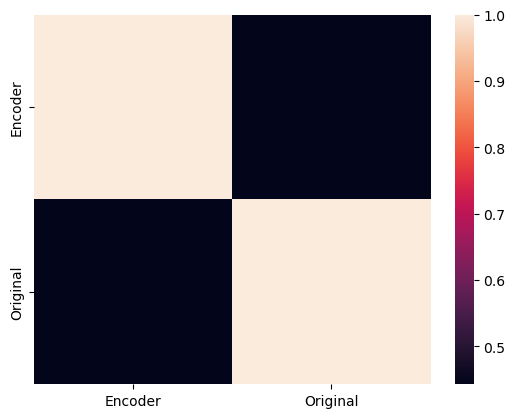

In [39]:
examQ4 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q4')
examQ4.fillna('', inplace=True)
examQ4.head()
answersQ4 = examQ4.iloc[:,2].values.tolist()

studentnoq4 = examQ4.iloc[:,0].values.tolist()
stno4 = []

for no in studentnoq4:
  stno4.append(str(no))
#print(answersQ1)

sentence_embeddings4 = model(answersQ4)
query4 = "Biochemistry isolates the protein of the functional organ and studies the chemical composition of the puree. Genetics study the population and observe how traits are being transmitted from parents to offspring through genes. Molecular Biology isolates the gene (DNA) and arrives at the protein form for biochemistry."
query_vec4 = model([query4])[0]
data4=[]
for sent in answersQ4:
  sim4 = cosine(query_vec4, model([sent])[0])
  grade = sim4*20
  if grade<0:
    grade = 0
  data4.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim4)

""" plt.figure(figsize=(20,20))
plt.plot(data4, stno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """
originalgrades4 = examQ4.iloc[:,5].values.tolist()
grades4df = pd.DataFrame({'Encoder':data4,'Original':originalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(grades4df)) :
  print(stno4[i],grades4df.loc[i, "Encoder"], grades4df.loc[i, "Original"])
print(grades4df.corr())

sns.heatmap(grades4df.corr())

r24 = r2_score(originalgrades4,data4)
print("R2: ",r24)

**Roberta Large**

In [40]:
examQ4 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q4')
examQ4.fillna('', inplace=True)
examQ4.head()
answersQ4 = examQ4.iloc[:,2].values.tolist()
originalgrades4 = examQ4.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery4 = "Biochemistry isolates the protein of the functional organ and studies the chemical composition of the puree. Genetics study the population and observe how traits are being transmitted from parents to offspring through genes. Molecular Biology isolates the gene (DNA) and arrives at the protein form for biochemistry."
tquery_vec4 = tmodel.encode(([tquery4])[0])
tdata4 = []



tstudentnoq4 = examQ4.iloc[:,0].values.tolist()
tstno4 = []

for no in tstudentnoq4:
  tstno4.append(str(no))


for sent in answersQ4:
  tsim4 = cosine(tquery_vec4, tmodel.encode(([sent])[0]))
  tgrade4 = tsim4*20
  if tgrade4<0:
    tgrade4 = 0    
  tdata4.append(round(tgrade4))
  print("Sentence = ", sent, "; similarity = ", tsim4)

""" plt.figure(figsize=(20,20))
plt.plot(tdata4, tstno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

tgradesdf4 = pd.DataFrame({'Encoder':tdata4,'Original':originalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf4)) :
  print(tstno4[i],tgradesdf4.loc[i, "Encoder"], tgradesdf4.loc[i, "Original"])
print(tgradesdf4.corr())

#sns.heatmap(tgradesdf4.corr())
#R-Squared
tr24 = r2_score(originalgrades4,tdata4)
print("R2: ",tr24)
print("T-Test Result: ",stats.ttest_ind(originalgrades4,tdata4))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf4)

Sentence =  theoriticl thinking less than other science
vitalist the organic from inorganic
all of them work and explain  cell , atoms , genetics ; similarity =  0.48612192
Sentence =  The most important relationship is  all of them interested biology. Using the biochemistry we can improve molecular biology and improve molecular biology we can study on genetics.  ; similarity =  0.4904697
Sentence =  Before all these terms (chemistry , biochemistry , molecular biology and genetics) we use to study on different things like light or math etc. We didn't know anything about these terms once we started to discover other things it lead us to found these terms . Newton and other scientist studied on light and we finally found telescope and similar tools and we found elements and chemistry has born with chemistry we could find microscobic compounds it lead us to molecular biology and once we collect more information about all these molecular biology and genetics etc. used all these information

**Bert Base**

Sentence =  theoriticl thinking less than other science
vitalist the organic from inorganic
all of them work and explain  cell , atoms , genetics ; similarity =  0.5946821
Sentence =  The most important relationship is  all of them interested biology. Using the biochemistry we can improve molecular biology and improve molecular biology we can study on genetics.  ; similarity =  0.6930981
Sentence =  Before all these terms (chemistry , biochemistry , molecular biology and genetics) we use to study on different things like light or math etc. We didn't know anything about these terms once we started to discover other things it lead us to found these terms . Newton and other scientist studied on light and we finally found telescope and similar tools and we found elements and chemistry has born with chemistry we could find microscobic compounds it lead us to molecular biology and once we collect more information about all these molecular biology and genetics etc. used all these information 

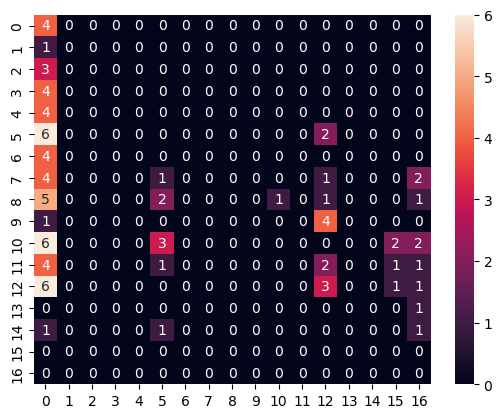

In [41]:
examQ4 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q4')
examQ4.fillna('', inplace=True)
examQ4.head()
answersQ4 = examQ4.iloc[:,2].values.tolist()
originalgrades4 = examQ4.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query4 = "Biochemistry isolates the protein of the functional organ and studies the chemical composition of the puree. Genetics study the population and observe how traits are being transmitted from parents to offspring through genes. Molecular Biology isolates the gene (DNA) and arrives at the protein form for biochemistry."
t2query_vec4 = tmodel2.encode(([t2query4])[0])
t2data4 = []



t2studentnoq4 = examQ4.iloc[:,0].values.tolist()
t2stno4 = []

for no in t2studentnoq4:
  t2stno4.append(str(no))


for sent in answersQ4:
  t2sim4 = cosine(t2query_vec4, tmodel2.encode(([sent])[0]))
  t2grade4 = t2sim4*20
  if t2grade4<0:
    t2grade4 = 0    
  t2data4.append(round(t2grade4))
  print("Sentence = ", sent, "; similarity = ", t2sim4)
"""
plt.figure(figsize=(20,20))
plt.plot(t2data4, t2stno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
"""
t2gradesdf4 = pd.DataFrame({'Encoder':t2data4,'Original':originalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf4)) :
  print(t2stno4[i],t2gradesdf4.loc[i, "Encoder"], t2gradesdf4.loc[i, "Original"])
print(t2gradesdf4.corr())

#sns.heatmap(t2gradesdf4.corr())
#R-Squared
t2r24 = r2_score(originalgrades4,t2data4)
print("R2: ",t2r24)
print("T-Test Result: ",stats.ttest_ind(originalgrades4,t2data4))

linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)


cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

print(t2gradesdf4)

**Q5**

In [42]:
examQ5 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q5')
examQ5.fillna('', inplace=True)
examQ5.head()
answersQ5 = examQ5.iloc[:,2].values.tolist()

studentnoq5 = examQ5.iloc[:,0].values.tolist()
stno5 = []

for no in studentnoq5:
  stno5.append(str(no))
#print(answersQ1)
studentno =examQ5.iloc[:,0].values.tolist()

sentence_embeddings5 = model(answersQ5)
query5 = "According to Adam Smith, wealth increases through the division of labor, specialization, and free trade."
query_vec5 = model([query5])[0]
data5=[]
for sent in answersQ5:
  sim5 = cosine(query_vec5, model([sent])[0])
  grade = sim5*20
  if grade<0:
    grade = 0
  data5.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim5)

""" plt.figure(figsize=(20,20))
plt.plot(data5, stno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """
originalgrades5 = examQ5.iloc[:,5].values.tolist()
grades5df = pd.DataFrame({'Encoder':data5,'Original':originalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(grades5df)) :
  print(stno5[i],grades5df.loc[i, "Encoder"], grades5df.loc[i, "Original"])
print(grades5df.corr())

#sns.heatmap(grades5df.corr())

r25 = r2_score(originalgrades5,data5)
print("R2: ",r25)


Sentence =  wealth increases by the division of labory , work ,job
State just use economy for the bridge , justice
 ; similarity =  0.4240727
Sentence =  Adam Smith believe that wealth was enhanced by division of labor.  ; similarity =  0.7383749
Sentence =  According to Smith division of labors is the key of increasing the wealth. ; similarity =  0.66414344
Sentence =  according to smith wealth icreases because of effecting of temprature pressure volume and liquid type. ; similarity =  0.3484881
Sentence =  Its for posion gas ; similarity =  -0.06493585
Sentence =   ; similarity =  0.0128147155
Sentence =  Wealth increases exponantial. The more you have money more you can earn. Because if you have enough money, you dont work for money, money works for you. ; similarity =  0.20386186
Sentence =  According to Smith wealth increases by division of labor. ; similarity =  0.7254212
Sentence =  Wealth increases if the people get the pay of their works. ; similarity =  0.28601027
Sentence = 

**Roberta Large**

Sentence =  wealth increases by the division of labory , work ,job
State just use economy for the bridge , justice
 ; similarity =  0.6867471
Sentence =  Adam Smith believe that wealth was enhanced by division of labor.  ; similarity =  0.88505846
Sentence =  According to Smith division of labors is the key of increasing the wealth. ; similarity =  0.8482752
Sentence =  according to smith wealth icreases because of effecting of temprature pressure volume and liquid type. ; similarity =  0.56056744
Sentence =  Its for posion gas ; similarity =  0.25634727
Sentence =   ; similarity =  0.047044147
Sentence =  Wealth increases exponantial. The more you have money more you can earn. Because if you have enough money, you dont work for money, money works for you. ; similarity =  0.5583551
Sentence =  According to Smith wealth increases by division of labor. ; similarity =  0.8313742
Sentence =  Wealth increases if the people get the pay of their works. ; similarity =  0.59052044
Sentence =  w

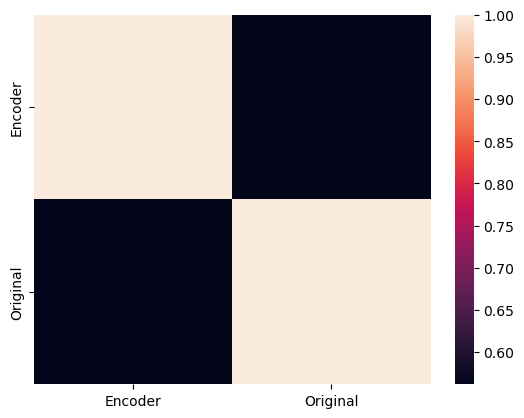

In [43]:
examQ5 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q5')
examQ5.fillna('', inplace=True)
examQ5.head()
answersQ5 = examQ5.iloc[:,2].values.tolist()
originalgrades5 = examQ5.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery5 = "According to Adam Smith, wealth increases through the division of labor, specialization, and free trade."
tquery_vec5 = tmodel.encode(([tquery5])[0])
tdata5 = []



tstudentnoq5 = examQ5.iloc[:,0].values.tolist()
tstno5 = []

for no in tstudentnoq5:
  tstno5.append(str(no))


for sent in answersQ5:
  tsim5 = cosine(tquery_vec5, tmodel.encode(([sent])[0]))
  tgrade5 = tsim5*20
  if tgrade5<0:
    tgrade5 = 0    
  tdata5.append(round(tgrade5))
  print("Sentence = ", sent, "; similarity = ", tsim5)
"""
plt.figure(figsize=(20,20))
plt.plot(tdata5, tstno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
"""
tgradesdf5 = pd.DataFrame({'Encoder':tdata5,'Original':originalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf5)) :
  print(tstno5[i],tgradesdf5.loc[i, "Encoder"], tgradesdf5.loc[i, "Original"])
print(tgradesdf5.corr())

sns.heatmap(tgradesdf5.corr())
#R-Squared
tr25 = r2_score(originalgrades5,tdata5)
print("R2: ",tr25)
print("T-Test Result: ",stats.ttest_ind(originalgrades5,tdata5))

linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)

"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf5)

**Bert Base**

Sentence =  wealth increases by the division of labory , work ,job
State just use economy for the bridge , justice
 ; similarity =  0.86046267
Sentence =  Adam Smith believe that wealth was enhanced by division of labor.  ; similarity =  0.88749725
Sentence =  According to Smith division of labors is the key of increasing the wealth. ; similarity =  0.87474185
Sentence =  according to smith wealth icreases because of effecting of temprature pressure volume and liquid type. ; similarity =  0.6676114
Sentence =  Its for posion gas ; similarity =  0.30725735
Sentence =   ; similarity =  0.095342085
Sentence =  Wealth increases exponantial. The more you have money more you can earn. Because if you have enough money, you dont work for money, money works for you. ; similarity =  0.69538254
Sentence =  According to Smith wealth increases by division of labor. ; similarity =  0.9073831
Sentence =  Wealth increases if the people get the pay of their works. ; similarity =  0.7645482
Sentence =  

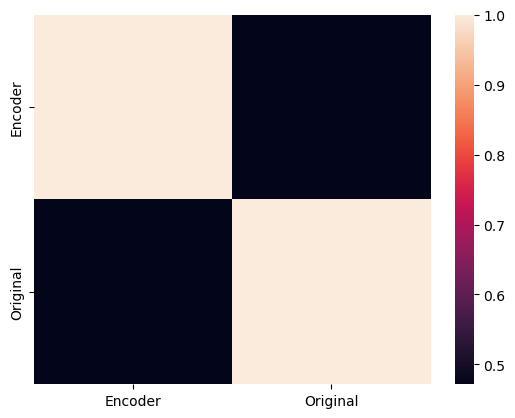

In [44]:
examQ5 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q5')
examQ5.fillna('', inplace=True)
examQ5.head()
answersQ5 = examQ5.iloc[:,2].values.tolist()
originalgrades5 = examQ5.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query5 = "According to Adam Smith, wealth increases through the division of labor, specialization, and free trade."
t2query_vec5 = tmodel2.encode(([t2query5])[0])
t2data5 = []



t2studentnoq5 = examQ5.iloc[:,0].values.tolist()
t2stno5 = []

for no in t2studentnoq5:
  t2stno5.append(str(no))


for sent in answersQ5:
  t2sim5 = cosine(t2query_vec5, tmodel2.encode(([sent])[0]))
  t2grade5 = t2sim5*20
  if t2grade5<0:
    t2grade5 = 0    
  t2data5.append(round(t2grade5))
  print("Sentence = ", sent, "; similarity = ", t2sim5)

""" plt.figure(figsize=(20,20))
plt.plot(t2data5, t2stno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show() """

t2gradesdf5 = pd.DataFrame({'Encoder':t2data5,'Original':originalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf5)) :
  print(t2stno4[i],t2gradesdf5.loc[i, "Encoder"], t2gradesdf5.loc[i, "Original"])
print(t2gradesdf5.corr())

sns.heatmap(t2gradesdf5.corr())
#R-Squared
t2r25 = r2_score(originalgrades5,t2data5)
print("R2: ",t2r25)
print("T-Test Result: ",stats.ttest_ind(originalgrades5,t2data5))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf5)

*Total of Midterm*

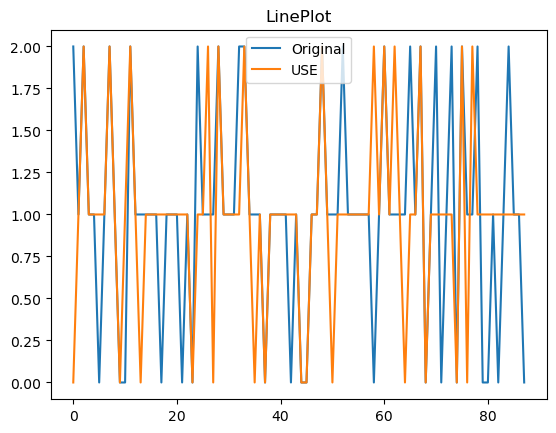

Comparison:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
Sum: 27
Original
 Successfull     52
High Success    18
Failed          18
Name: Original, dtype: int64


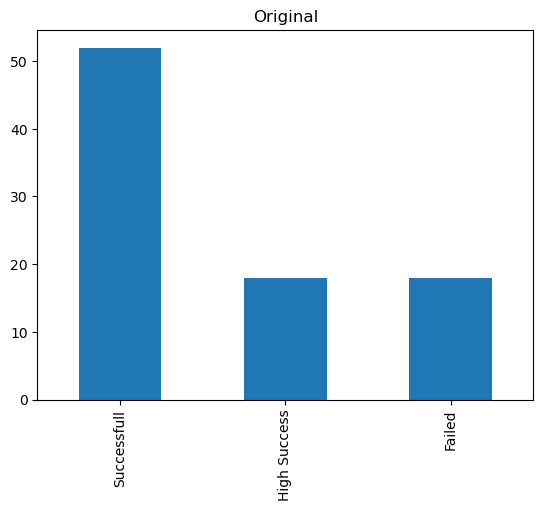

USE
 Successfull     61
Failed          14
High Success    13
Name: USE, dtype: int64


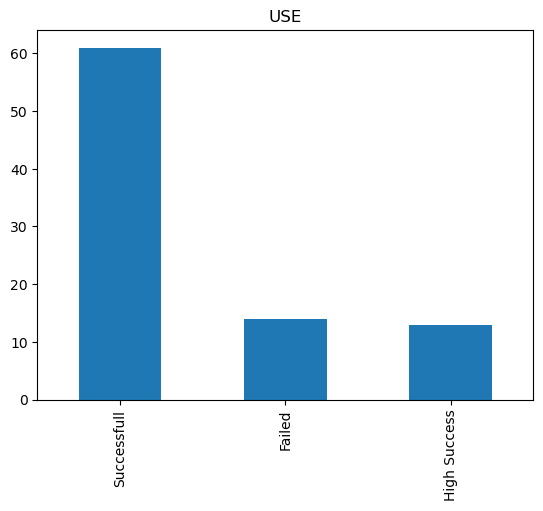

Values: 
         Original           USE
0   High Success        Failed
1    Successfull   Successfull
2   High Success  High Success
3    Successfull   Successfull
4    Successfull   Successfull
..           ...           ...
83   Successfull   Successfull
84  High Success   Successfull
85   Successfull   Successfull
86   Successfull   Successfull
87        Failed   Successfull

[88 rows x 2 columns]
BERT
 Successfull     55
High Success    19
Failed          14
Name: BERT, dtype: int64


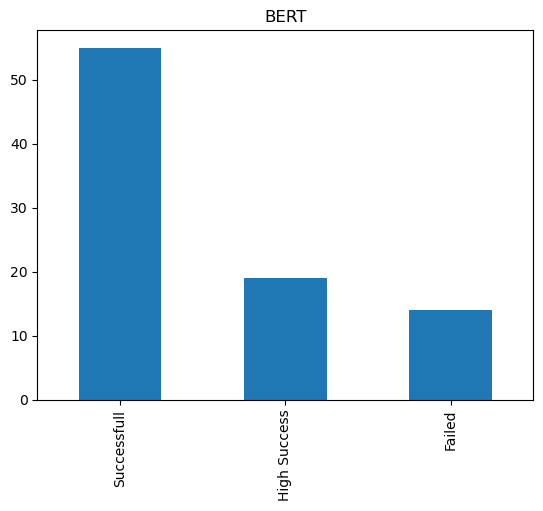

Roberta
 Successfull     56
High Success    17
Failed          15
Name: Roberta, dtype: int64


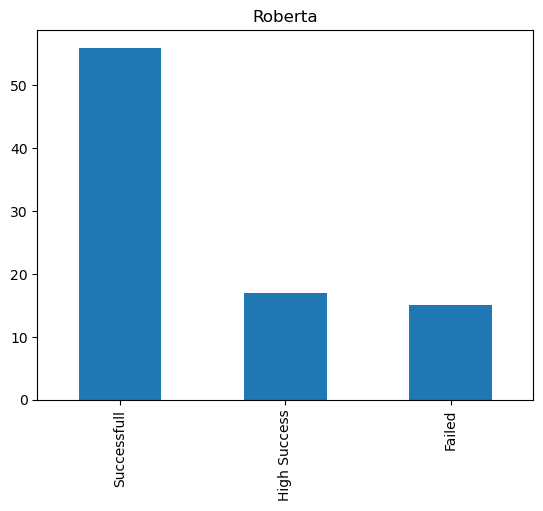

    SumOriginal  SumEncoder  RobertaLargeSum  BertBaseSum
0            60          31               53           61
1            36          53               62           69
2            71          58               69           75
3            32          39               57           69
4            30          33               50           65
..          ...         ...              ...          ...
83           16          32               49           61
84           60          48               53           63
85           28          45               49           62
86           42          53               66           71
87           10          41               48           58

[88 rows x 4 columns]
                 SumOriginal  SumEncoder  RobertaLargeSum  BertBaseSum
SumOriginal         1.000000    0.607118         0.607666     0.554068
SumEncoder          0.607118    1.000000         0.884518     0.879933
RobertaLargeSum     0.607666    0.884518         1.000000     0.9347

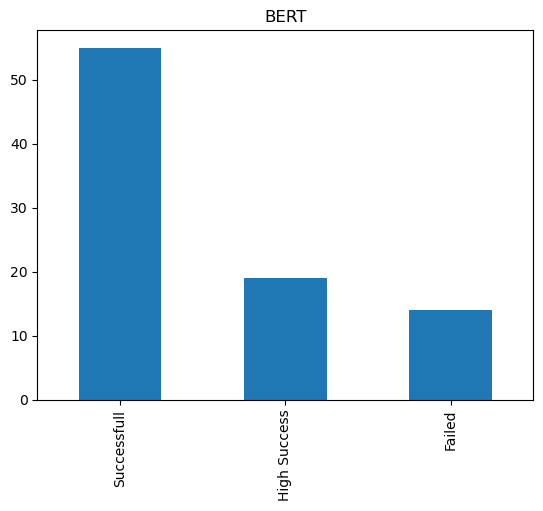

Rows where 'Original' and 'USE' grades are different:
        Original           USE
0   High Success        Failed
5         Failed   Successfull
10        Failed   Successfull
13   Successfull        Failed
17        Failed   Successfull
21        Failed   Successfull
24  High Success   Successfull
26   Successfull  High Success
27   Successfull        Failed
32  High Success   Successfull
35   Successfull        Failed
42        Failed   Successfull
50   Successfull        Failed
52  High Success   Successfull
58        Failed  High Success
62   Successfull  High Success
64   Successfull        Failed
65  High Success   Successfull
70  High Success   Successfull
71        Failed   Successfull
73  High Success   Successfull
76   Successfull        Failed
77   Successfull  High Success
78  High Success   Successfull
79        Failed   Successfull
80        Failed   Successfull
82        Failed   Successfull
84  High Success   Successfull
87        Failed   Successfull
Rows where 'Orig

In [100]:
from scipy.optimize import curve_fit
from matplotlib import pyplot
from numpy import arange
import scipy.stats as stats
#print(encodersum)
sumencoder = [data,data2,data3,data4,data5]
midtermsumencoder = [sum(x) for x in zip(*sumencoder)]
encodersum =pd.DataFrame({'SumEncoder': midtermsumencoder})
usefinal = []


#print(robertasum)
tsumencoder = [tdata,tdata2,tdata3,tdata4,tdata5]
tmidtermsumencoder = [sum(x) for x in zip(*tsumencoder)]
tencodersum =pd.DataFrame({'SumEncoder': tmidtermsumencoder})


#print(bertbasesum)
t2sumencoder = [t2data,t2data2,t2data3,t2data4,t2data5]
t2midtermsumencoder = [sum(x) for x in zip(*t2sumencoder)]
t2encodersum =pd.DataFrame({'SumEncoder': t2midtermsumencoder})


sumoriginal = [originalgrades,originalgrades2,originalgrades3,originalgrades4,originalgrades5]
midtermsumoriginal = [sum(x) for x in zip(*sumoriginal)]
midtermsum =pd.DataFrame({'SumMidterm': midtermsumoriginal})
#print(midtermsum)

originalfinal = []

orgzscore = stats.zscore(midtermsumoriginal)
usezscore = stats.zscore(midtermsumencoder)
bertzscore = stats.zscore(t2midtermsumencoder)
robertazscore = stats.zscore(tmidtermsumencoder)
ozscore = []
for x in orgzscore:
    if x<=-1:
        ozscore.append(0)
    if -1<x<=1:
        ozscore.append(1)
    if x>1:
        ozscore.append(2)

uzscore = []
for x in usezscore:
    if x<=-1:
        uzscore.append(0)
    if -1<x<=1:
        uzscore.append(1)
    if x>1:
        uzscore.append(2)

bzscore = []
for x in bertzscore:
    if x<=-1:
        bzscore.append(0)
    if -1<x<=1:
        bzscore.append(1)
    if x>1:
        bzscore.append(2)

rbzscore = []
for x in robertazscore:
    if x<=-1:
        rbzscore.append(0)
    if -1<x<=1:
        rbzscore.append(1)
    if x>1:
        rbzscore.append(2)
        
zscorelabeled = pd.DataFrame({"Original":ozscore,"USE":uzscore})
zscorelabeled.plot.line(title = "LinePlot")
plt.show()

comparison = []

for i in range(len(uzscore)):
    if ozscore[i] == uzscore[i]:
        comparison.append(0)
    elif abs(ozscore[i]-uzscore[i])==1:
        comparison.append(1)
print("Comparison: ",comparison)
print("Sum:",sum(comparison))


zscorelabeled.replace({0:"Failed",1:"Successfull",2:"High Success"},inplace=True)
#print("Z-score for USE: ",stats.zscore(midtermsumencoder))
print("Original\n",zscorelabeled.Original.value_counts(0))

#bar
zscorelabeled.Original.value_counts().plot.bar(title="Original")
plt.show()

print("USE\n",zscorelabeled.USE.value_counts(0))
#bar
zscorelabeled.USE.value_counts().plot.bar(title="USE")
plt.show()

print("Values: \n",zscorelabeled)

zscorelabeled2 = pd.DataFrame({"Original":ozscore,"BERT":bzscore})
zscorelabeled2.replace({0:"Failed",1:"Successfull",2:"High Success"},inplace=True)
print("BERT\n",zscorelabeled2.BERT.value_counts(0))

#bar
zscorelabeled2.BERT.value_counts().plot.bar(title="BERT")
plt.show()

#print("BERT Valueleri mi?",zscorelabeled2["BERT"])

zscorelabeled3 = pd.DataFrame({"Original":ozscore,"Roberta":rbzscore})
zscorelabeled3.replace({0:"Failed",1:"Successfull",2:"High Success"},inplace=True)
print("Roberta\n",zscorelabeled3.Roberta.value_counts(0))

#bar
zscorelabeled3.Roberta.value_counts().plot.bar(title="Roberta")
plt.show()

midtermresult = pd.DataFrame({'SumOriginal':midtermsumoriginal,'SumEncoder':midtermsumencoder,'RobertaLargeSum':tmidtermsumencoder,'BertBaseSum':t2midtermsumencoder})
print(midtermresult)
print(midtermresult.corr())
#sns.heatmap(midtermresult.corr())

rmidterm = r2_score(midtermresult.SumOriginal,midtermresult.SumEncoder)
print("R2 score for USE: ",rmidterm)
print("T-Test Result for USE: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.SumEncoder))

rmidtermroberta = r2_score(midtermresult.SumOriginal,midtermresult.RobertaLargeSum)
print("R2 score for Roberta Large: ",rmidtermroberta)
print("T-Test Result for Roberta Large: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.RobertaLargeSum))

rmidtermbertbase = r2_score(midtermresult.SumOriginal,midtermresult.BertBaseSum)
print("R2 score for Bert Base: ",rmidtermbertbase)
print("T-Test Result for Bert Base: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.BertBaseSum))


meandf = midtermresult.mean()
print("Mean of each column is: ",meandf)

stdevdf = midtermresult.std()
print("Standart Deviation of each column is:\n ",stdevdf)

"""
midtermresult = pd.concat[encodersum,midtermsum]
print(midtermresult.head())
sns.heatmap(midtermresult.corr())
"""
print(midtermresult)

""" plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.SumEncoder, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('Encoder', fontsize=16)
plt.show()

plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.RobertaLargeSum, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('Roberta', fontsize=16)
plt.show()

plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.BertBaseSum, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('BertBase', fontsize=16)
plt.show()
 """


#3 modelin ortalaması vs original
normalized = []
for x in midtermresult.SumEncoder:
    normalized.append(round((x-13)*1.7))

def test(x, a, b):
    return a*x +b
 
param, param_cov = curve_fit(test, midtermresult.SumOriginal, normalized)
ans = param[0]*midtermresult.SumOriginal +param[1]



""" plt.plot(midtermresult.SumOriginal, normalized, 'o', color ='red', label ="data")
plt.plot(midtermresult.SumOriginal, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show() """


print(normalized)




original = []
for x in midtermresult.SumOriginal:
    if x<=33:
        original.append(0)
    if 33<x<66:
        original.append(1)
    if x>=66:
        original.append(2)

print("original",original)

use = []
for x in midtermresult.SumEncoder:
    if x<=33:
        use.append(0)
    if 33<x<66:
        use.append(1)
    if x>=66:
        use.append(2)

print("use",use)

roberta = []
for x in midtermresult.RobertaLargeSum:
    if x<=33:
        roberta.append(0)
    if 33<x<66:
        roberta.append(1)
    if x>=66:
        roberta.append(2)

print("roberta",roberta)

bert = []
for x in midtermresult.BertBaseSum:
    if x<=33:
        bert.append(0)
    if 33<x<66:
        bert.append(1)
    if x>=66:
        bert.append(2)

print("bert",bert)





# Count the number of values that are the same
same_values = (zscorelabeled['Original'] == zscorelabeled['USE']).sum()

# Count the number of values that are different
different_values = len(zscorelabeled) - same_values

# Print the results
print("Number of values that are the same: ", same_values)
print("Number of values that are different: ", different_values)

zscorelabeled2 = pd.DataFrame({"Original":ozscore,"BERT":bzscore})
zscorelabeled2.replace({0:"Failed",1:"Successfull",2:"High Success"},inplace=True)
# Count the number of values that are the same
same_values_bert = (zscorelabeled2['Original'] == zscorelabeled2['BERT']).sum()

# Count the number of values that are different
different_values_bert = len(zscorelabeled2) - same_values_bert

# Print the results
print("Number of values that are the same (Original vs BERT): ", same_values_bert)
print("Number of values that are different (Original vs BERT): ", different_values_bert)

print("BERT\n",zscorelabeled2.BERT.value_counts(0))
#bar
zscorelabeled2.BERT.value_counts().plot.bar(title="BERT")
plt.show()


different_rows_use = zscorelabeled[zscorelabeled['Original'] != zscorelabeled['USE']]

# Display the rows where grades are different
print("Rows where 'Original' and 'USE' grades are different:")
print(different_rows_use)

different_rows_bert = zscorelabeled2[zscorelabeled2['Original'] != zscorelabeled2['BERT']]

# Display the rows where grades are different
print("Rows where 'Original' and 'BERT' grades are different:")
print(different_rows_bert)

different_rows_roberta = zscorelabeled3[zscorelabeled3['Original'] != zscorelabeled3['Roberta']]
print("Rows where 'Original' and 'Roberta' grades are different:")
print(different_rows_roberta)

# Create boolean masks for each comparison
mask_use_diff = zscorelabeled['Original'] != zscorelabeled['USE']
mask_bert_diff = zscorelabeled2['Original'] != zscorelabeled2['BERT']
mask_roberta_diff = zscorelabeled3['Original'] != zscorelabeled3['Roberta']


# Count the number of differences for each comparison
count_use_diff = mask_use_diff.sum()
count_bert_diff = mask_bert_diff.sum()
count_roberta_diff = mask_roberta_diff.sum()

# Display the counts
print(f"Number of rows different between Original and USE grades: {count_use_diff}")
print(f"Number of rows different between Original and BERT grades: {count_bert_diff}")
print(f"Number of rows different between Original and Roberta grades: {count_roberta_diff}")


In [93]:
# Create DataFrame with original grades, encoder grades, and student numbers
cevap1 = pd.DataFrame({'StudentNo': t2studentnoq1, 'Original': originalgrades,'BERT': t2data, 'USE': data, 'Roberta': tdata})
print(cevap1)

cevap2 = pd.DataFrame({'StudentNo': t2studentnoq2, 'Original': originalgrades2,'BERT': t2data2, 'USE': data2, 'Roberta': tdata2})
print(cevap2)

cevap3 = pd.DataFrame({'StudentNo': t2studentnoq3, 'Original': originalgrades3,'BERT': t2data3, 'USE': data3, 'Roberta': tdata3})
print(cevap3)

cevap4 = pd.DataFrame({'StudentNo': t2studentnoq4, 'Original': originalgrades4,'BERT': t2data4, 'USE': data4, 'Roberta': tdata4})
print(cevap4)

cevap5 = pd.DataFrame({'StudentNo': t2studentnoq5, 'Original': originalgrades5,'BERT': t2data5, 'USE': data5, 'Roberta': tdata5})
print(cevap5)
""" 
cevap1.to_excel("cevap1.xlsx")
cevap2.to_excel("cevap2.xlsx")
cevap3.to_excel("cevap3.xlsx")
cevap4.to_excel("cevap4.xlsx")
cevap5.to_excel("cevap5.xlsx")
 """

# Concatenate DataFrames along the rows
merged_cevap = pd.concat([cevap1, cevap2, cevap3, cevap4, cevap5])

# Group by 'StudentNo' and calculate the sum for each group
sum_df = merged_cevap.groupby('StudentNo').sum().reset_index()

cevap1_with_answers = cevap1.copy()  # Orijinal DataFrame'i kopyalayın
cevap2_with_answers = cevap2.copy()
cevap3_with_answers = cevap3.copy()
cevap4_with_answers = cevap4.copy()
cevap5_with_answers = cevap5.copy()

cevap1_with_answers['Students answer'] = answersQ1
cevap2_with_answers['Students answer'] = answersQ2
cevap3_with_answers['Students answer'] = answersQ3
cevap4_with_answers['Students answer'] = answersQ4
cevap5_with_answers['Students answer'] = answersQ5

cevap1_with_answers['Instructors answer'] = query
cevap2_with_answers['Instructors answer'] = query2
cevap3_with_answers['Instructors answer'] = query3
cevap4_with_answers['Instructors answer'] = query4
cevap5_with_answers['Instructors answer'] = query5

# Kaydetmek istediğiniz Excel dosyasının adı
excel_filename = 'vizegrades.xlsx'

# Excel dosyasını oluşturun
with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    # Her bir cevap DataFrame'ini ayrı bir sayfa olarak kaydedin
    cevap1_with_answers.to_excel(writer, sheet_name='cevap1', index=False)
    cevap2_with_answers.to_excel(writer, sheet_name='cevap2', index=False)
    cevap3_with_answers.to_excel(writer, sheet_name='cevap3', index=False)
    cevap4_with_answers.to_excel(writer, sheet_name='cevap4', index=False)
    cevap5_with_answers.to_excel(writer, sheet_name='cevap5', index=False)

    # Toplam notları içeren DataFrame'i kaydedin
    sum_df.to_excel(writer, sheet_name='Toplam', index=False)


      StudentNo  Original  BERT  USE  Roberta
0   20160807006        20    11    7       10
1   20160807009         0     8    3        7
2   20170808017        20    14   13       12
3   20170808045        12    14    5       11
4   20190808008         0    15    8        9
..          ...       ...   ...  ...      ...
83  20210808605         0    12    5        7
84  20210808607        12    15    9       11
85  20210808609        12    17   12       14
86  20210808617        12    12    9       11
87  20210808618         0    14   12       13

[88 rows x 5 columns]
      StudentNo  Original  BERT  USE  Roberta
0   20160807006        20    14    3       11
1   20160807009        10    14   10       12
2   20170808017        20    17   14       16
3   20170808045        10    14    8       14
4   20190808008        20    16    7       14
..          ...       ...   ...  ...      ...
83  20210808605        10    16    9       15
84  20210808607        10     9    9       10
85  2021080

***Final***

**Q1**

Sentence =  The founding of the steam engine started the industrial revoulution because when steam engine found, european countries like england started to manufacture things faster then normal methods like manufacturing with hand. Factories opened, and in war and other industries rised. ; similarity =  0.66811883
Sentence =  The steam engine is considered the starting point of the industrial revolution. Thanks to the steam engine, machines have been developed in many textile fields (power loompower loom, spinning mule) ; similarity =  0.6987426
Sentence =  Steam engine does not get tired and don't ask for salary. And provided transportation faster and cheaper. ; similarity =  0.385238
Sentence =    ; similarity =  -0.043805316
Sentence =  Steam Engine. With this invention, the foundations of the industrial revolution were laid.Transportation could be provided much cheaper and faster than before.Thanks to the industrial revolution, many more things have been opened. ; similarity =  0.7

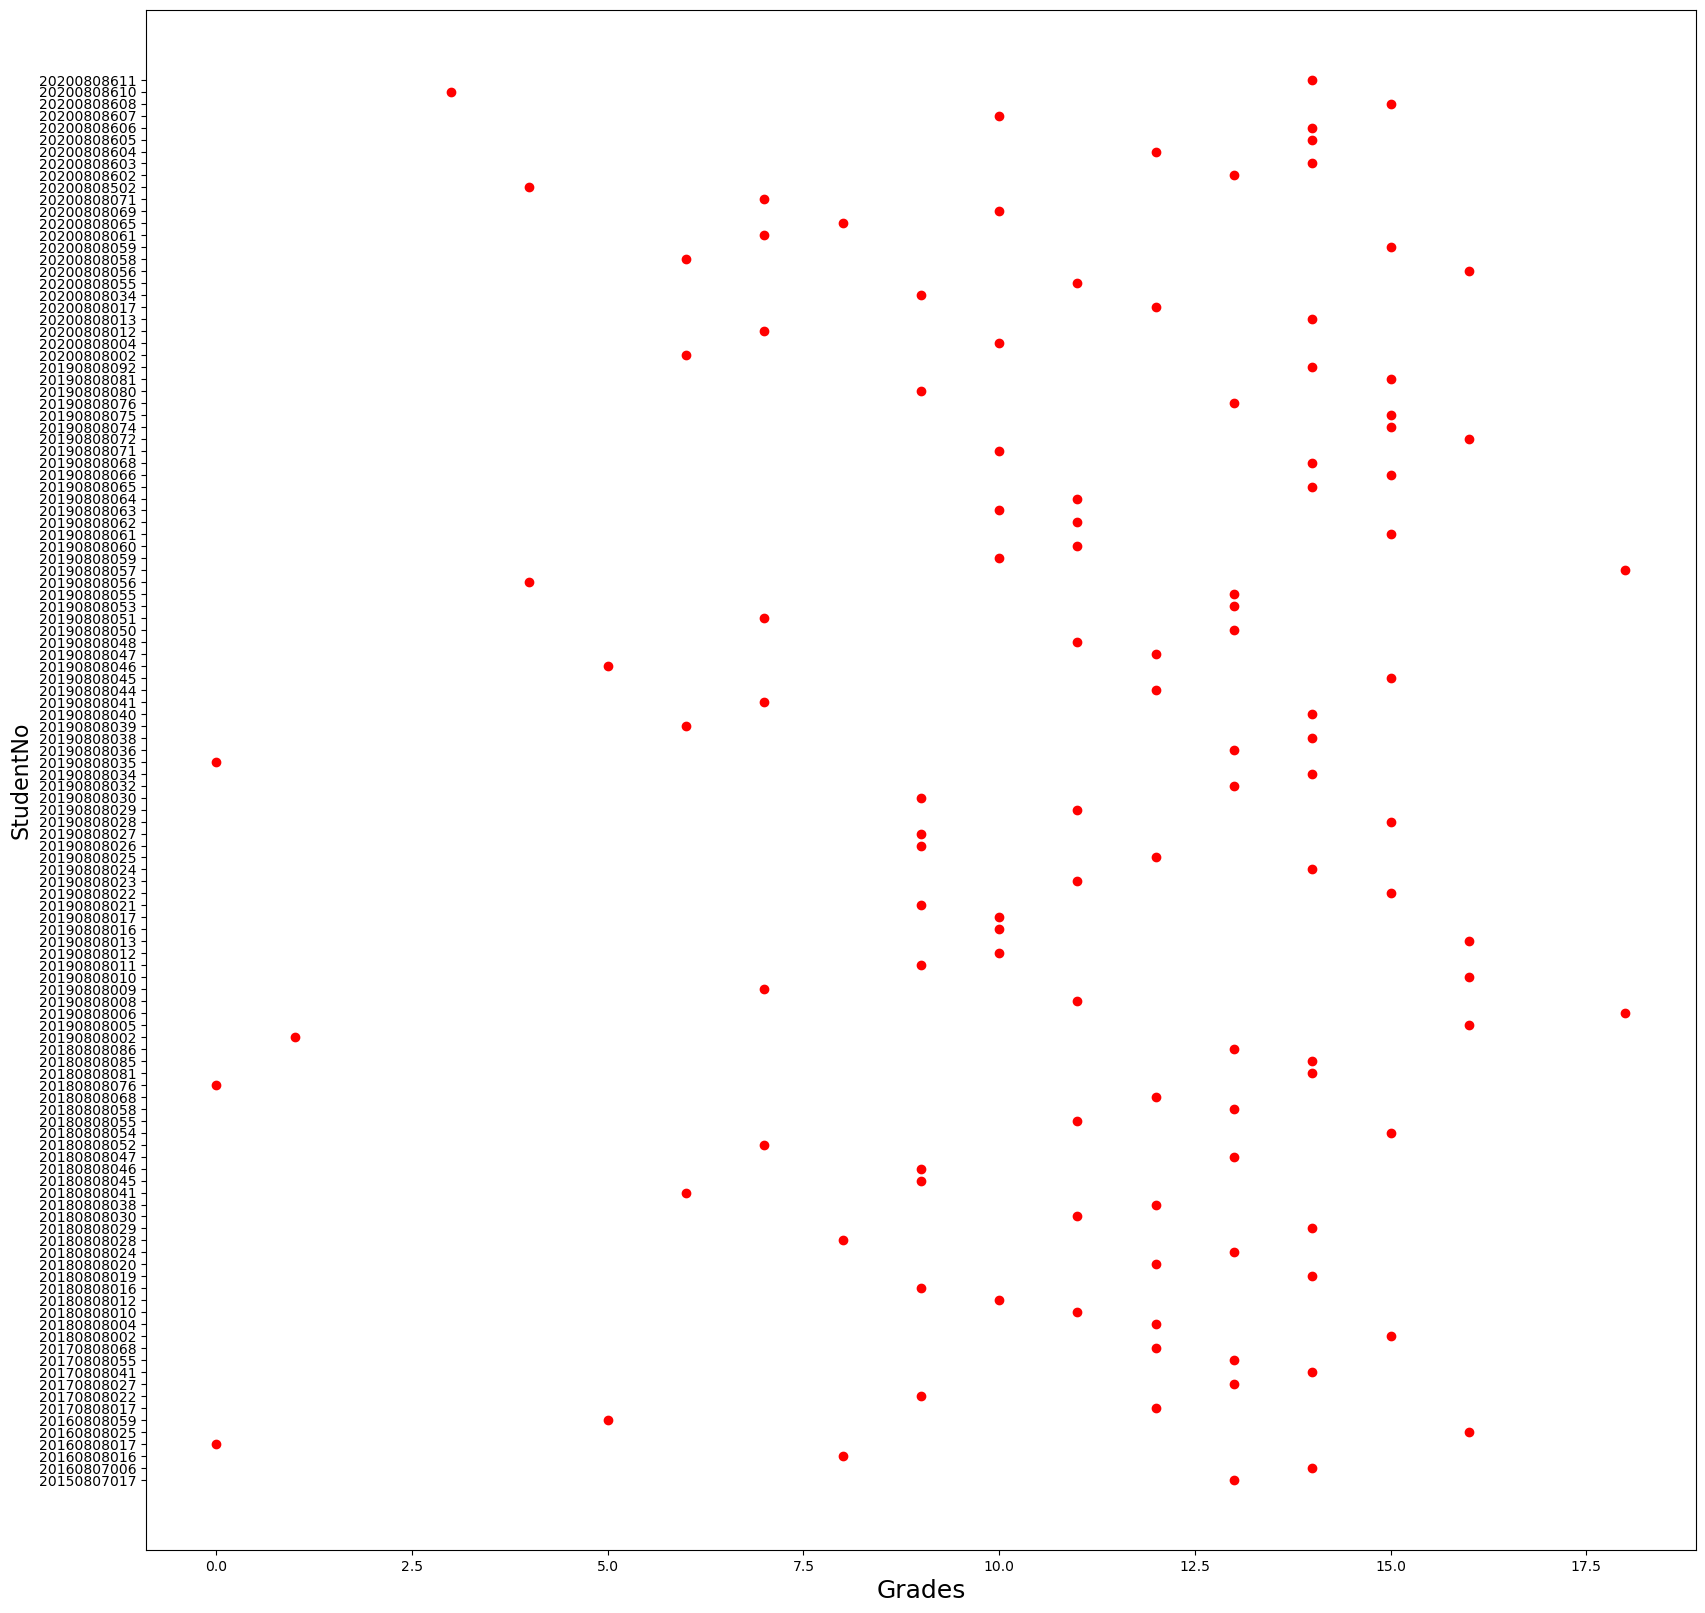

Number:    Encoder:    Original
20150807017 13 20
20160807006 14 20
20160808016 8 10
20160808017 0 0
20160808025 16 10
20160808059 5 10
20170808017 12 20
20170808022 9 20
20170808027 13 20
20170808041 14 20
20170808055 13 20
20170808068 12 10
20180808002 15 20
20180808004 12 20
20180808010 11 20
20180808012 10 20
20180808016 9 10
20180808019 14 20
20180808020 12 20
20180808024 13 20
20180808028 8 20
20180808029 14 20
20180808030 11 20
20180808038 12 20
20180808041 6 20
20180808045 9 10
20180808046 9 20
20180808047 13 20
20180808052 7 0
20180808054 15 20
20180808055 11 20
20180808058 13 20
20180808068 12 20
20180808076 0 0
20180808081 14 20
20180808085 14 20
20180808086 13 20
20190808002 1 10
20190808005 16 20
20190808006 18 10
20190808008 11 20
20190808009 7 10
20190808010 16 20
20190808011 9 20
20190808012 10 10
20190808013 16 20
20190808016 10 0
20190808017 10 20
20190808021 9 10
20190808022 15 20
20190808023 11 10
20190808024 14 0
20190808025 12 20
20190808026 9 10
20190808027 9 20


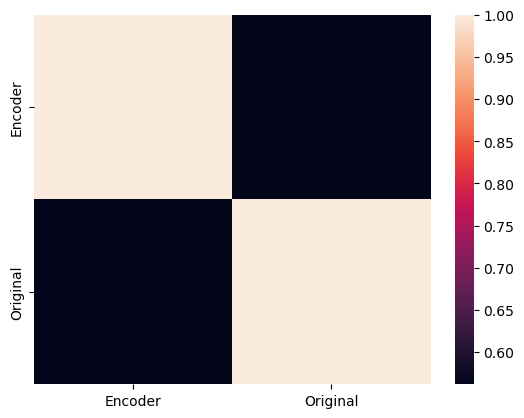

In [47]:



finalexamQ1 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q1')
finalexamQ1.fillna('', inplace=True)
finalexamQ1.head()
finalanswersQ1 = finalexamQ1.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings = model(finalanswersQ1)
finalquery = 'Invention of the steam engine started the industrial revolution.'
finalquery_vec = model([finalquery])[0]
finaldata=[]
for sent in finalanswersQ1:
  finalsim = cosine(finalquery_vec, model([sent])[0])
  grade = finalsim*20
  if grade<0:
    grade = 0
  finaldata.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim)

finalstudentno =finalexamQ1.iloc[:,0].values.tolist()
finalstno = []

for no in finalstudentno:
  finalstno.append(str(no))
#print(answersQ1)

plt.figure(figsize=(20,20))
plt.plot(finaldata, finalstno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades = finalexamQ1.iloc[:,4].values.tolist()
finalgradesdf = pd.DataFrame({'Encoder':finaldata,'Original':finaloriginalgrades})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf)) :
  print(finalstno[i],finalgradesdf.loc[i, "Encoder"], finalgradesdf.loc[i, "Original"])
print(finalgradesdf.corr())
sns.heatmap(finalgradesdf.corr())

r2f1 = r2_score(finaloriginalgrades,finaldata)
print("R2: ",r2f1)

**Q2**

Sentence =  Computer scientists working on stereochemistry because modeling and seeing atoms and molecules in computer is much easier then theorising and doing calculations without computer.  How they are working is they use computers to model and see little particles. And it can be used to use electron microscopes and other important tools.  ; similarity =  0.39845446
Sentence =  Stereochemistry is now not an remoted area of simple technological know-how and has turn out to be carefully related with many chemistry, scientific chemistry, polymer technological know-how, new substances engineering and plenty of different branches. laptop engineering is amongst them. With optical activation, the connection among laptop technological know-how and stereochemistry is growing ; similarity =  0.1398261
Sentence =  Because, we need virtualization of molecules. On computer we can virtualize molecule behavior. That is why computer scientist work on Steroochemistry. ; similarity =  0.29817414
Sent

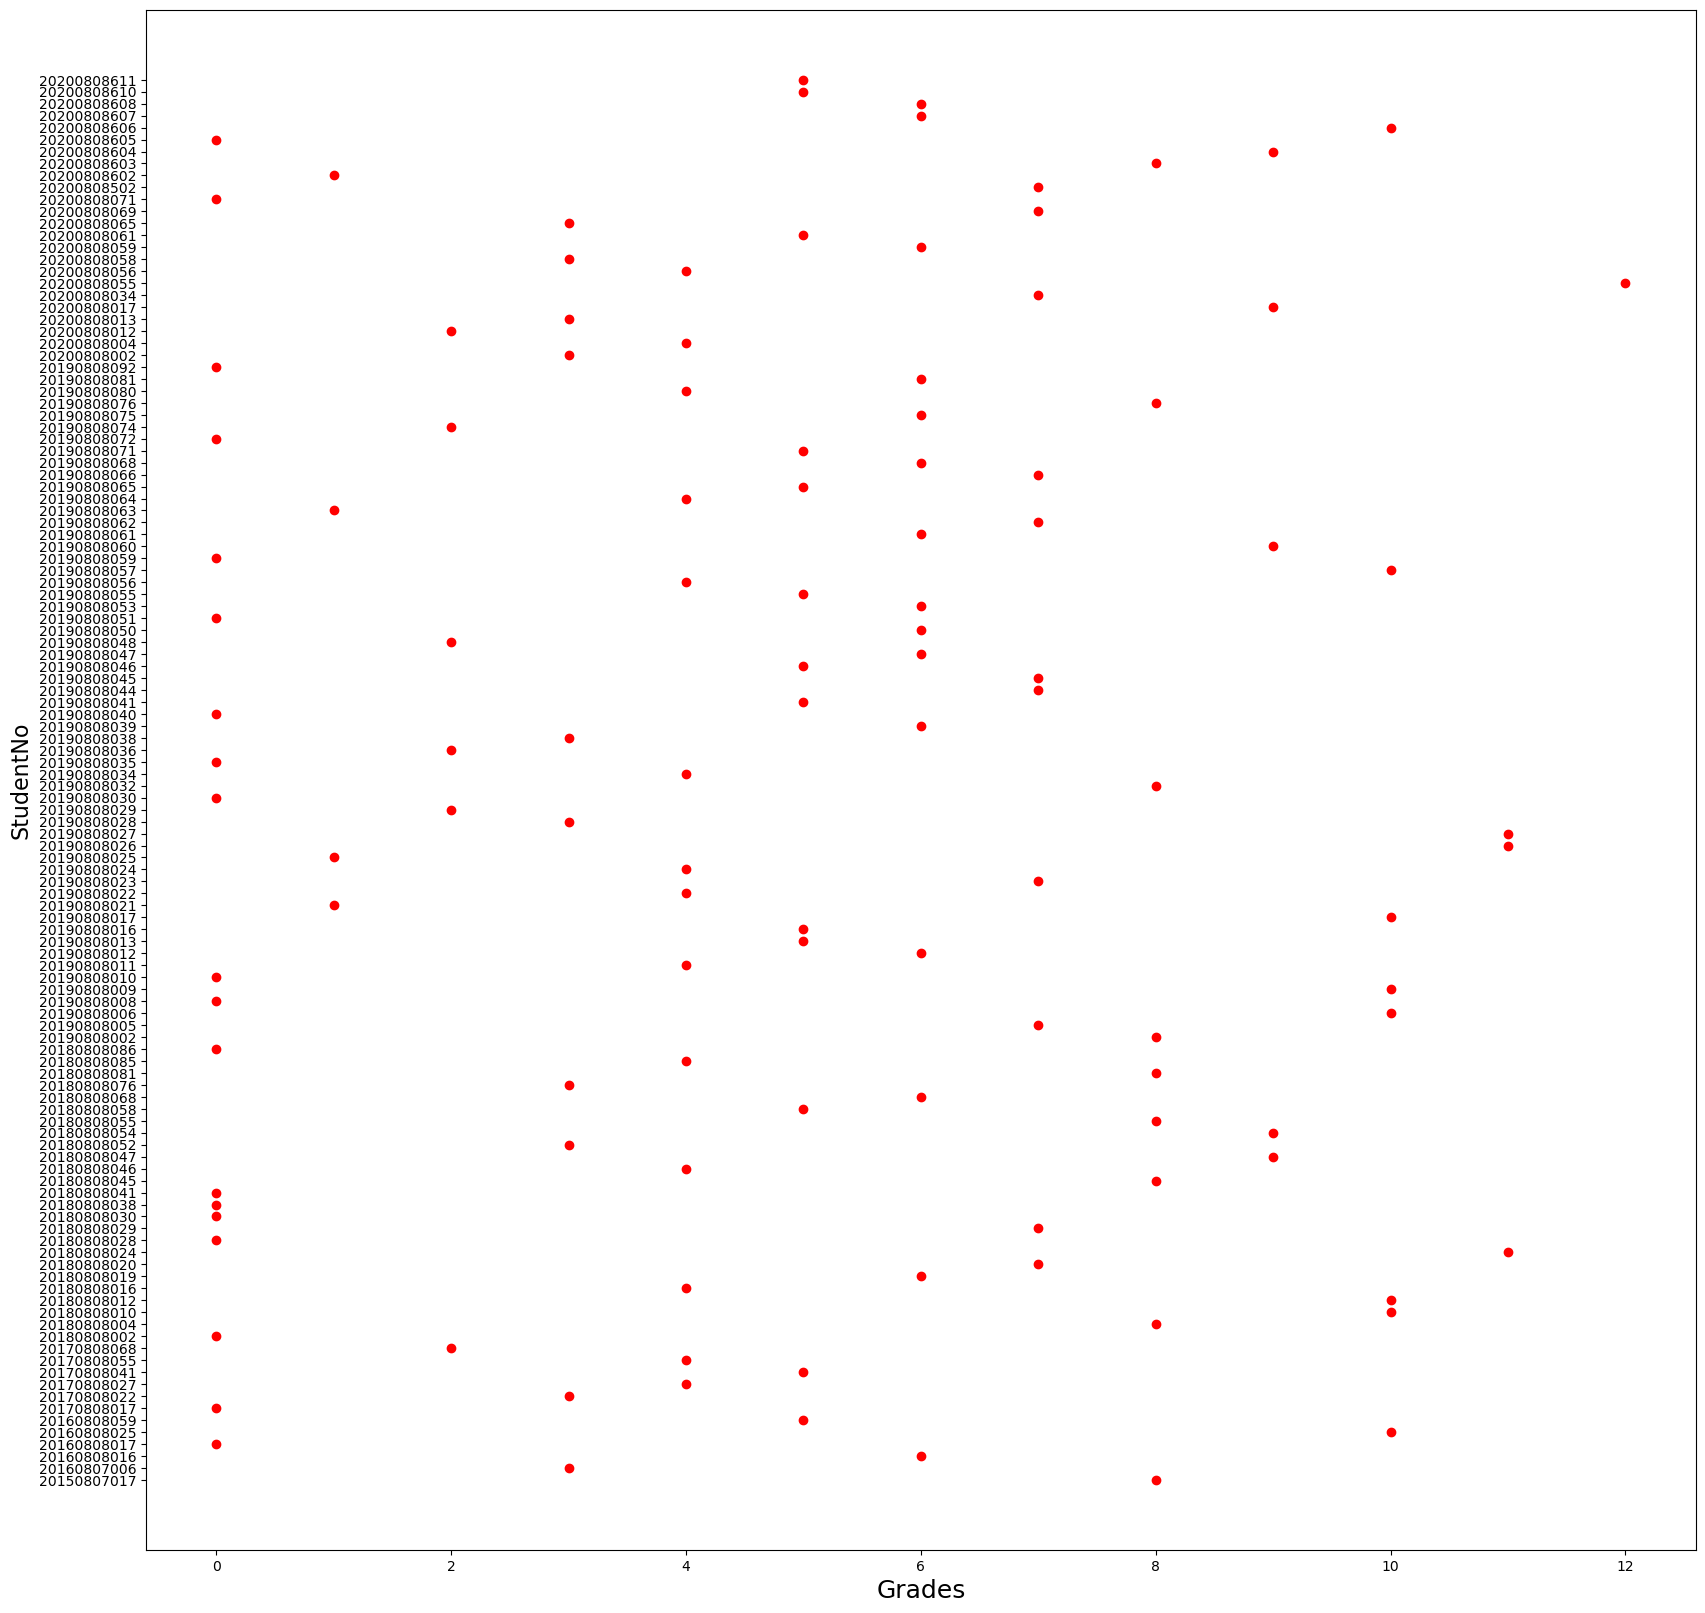

Number:    Encoder:    Original
20150807017 8 16
20160807006 3 0
20160808016 6 16
20160808017 0 0
20160808025 10 16
20160808059 5 8
20170808017 0 0
20170808022 3 8
20170808027 4 8
20170808041 5 8
20170808055 4 8
20170808068 2 0
20180808002 0 0
20180808004 8 20
20180808010 10 20
20180808012 10 20
20180808016 4 8
20180808019 6 0
20180808020 7 8
20180808024 11 20
20180808028 0 0
20180808029 7 16
20180808030 0 0
20180808038 0 0
20180808041 0 0
20180808045 8 16
20180808046 4 8
20180808047 9 16
20180808052 3 8
20180808054 9 16
20180808055 8 16
20180808058 5 16
20180808068 6 16
20180808076 3 0
20180808081 8 8
20180808085 4 16
20180808086 0 0
20190808002 8 8
20190808005 7 16
20190808006 10 8
20190808008 0 0
20190808009 10 8
20190808010 0 0
20190808011 4 0
20190808012 6 16
20190808013 5 8
20190808016 5 8
20190808017 10 20
20190808021 1 0
20190808022 4 8
20190808023 7 20
20190808024 4 8
20190808025 1 0
20190808026 11 16
20190808027 11 16
20190808028 3 8
20190808029 2 0
20190808030 0 0
2019080803

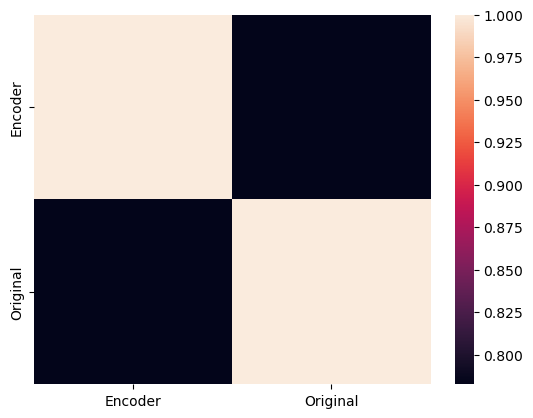

In [48]:
finalexamQ2 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q2')
finalexamQ2.fillna('', inplace=True)
finalexamQ2.head()
finalanswersQ2 = finalexamQ2.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings2 = model(finalanswersQ2)
finalquery2 = '3D modeling of protein molecules structure. '
finalquery_vec2 = model([finalquery2])[0]
finaldata2=[]
for sent in finalanswersQ2:
  finalsim2 = cosine(finalquery_vec2, model([sent])[0])
  grade = finalsim2*20
  if grade<0:
    grade = 0
  finaldata2.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim2)

finalstudentno2 =finalexamQ2.iloc[:,0].values.tolist()
finalstno2 = []

for no in finalstudentno2:
  finalstno2.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata2, finalstno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades2 = finalexamQ2.iloc[:,3].values.tolist()
finalgradesdf2 = pd.DataFrame({'Encoder':finaldata2,'Original':finaloriginalgrades2})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf2)) :
  print(finalstno2[i],finalgradesdf2.loc[i, "Encoder"], finalgradesdf2.loc[i, "Original"])

print(finalgradesdf2.corr())

sns.heatmap(finalgradesdf2.corr())
r2f2 = r2_score(finaloriginalgrades2,finaldata2)
print("R2: ",r2f2)

**Q3**

Sentence =  Entropy is about randomness in things in universe. It helped calculations and manupilations of things in information era and helped development of most of the technologies. ; similarity =  0.44587222
Sentence =  nformation isn't always absolutely abstract. Because it's far in bodily methods to move records, this suggests that it'll act consistent with the legal guidelines of physics. As a result, it suggests that the electricity and records withinside the universe are interconnected.
We use records to arrange the universe and to lessen entropy, or disorder. But due to the fact records is saved in constrained stores, the antique one is deleted whenever new records arrives. and way to that it will increase entropy ; similarity =  0.4248652
Sentence =  Information entropy provide us how to transmit information with optimumly. That is important for working on information and transmit info. Comminication grow up. ; similarity =  0.3091972
Sentence =    ; similarity =  0.0830355


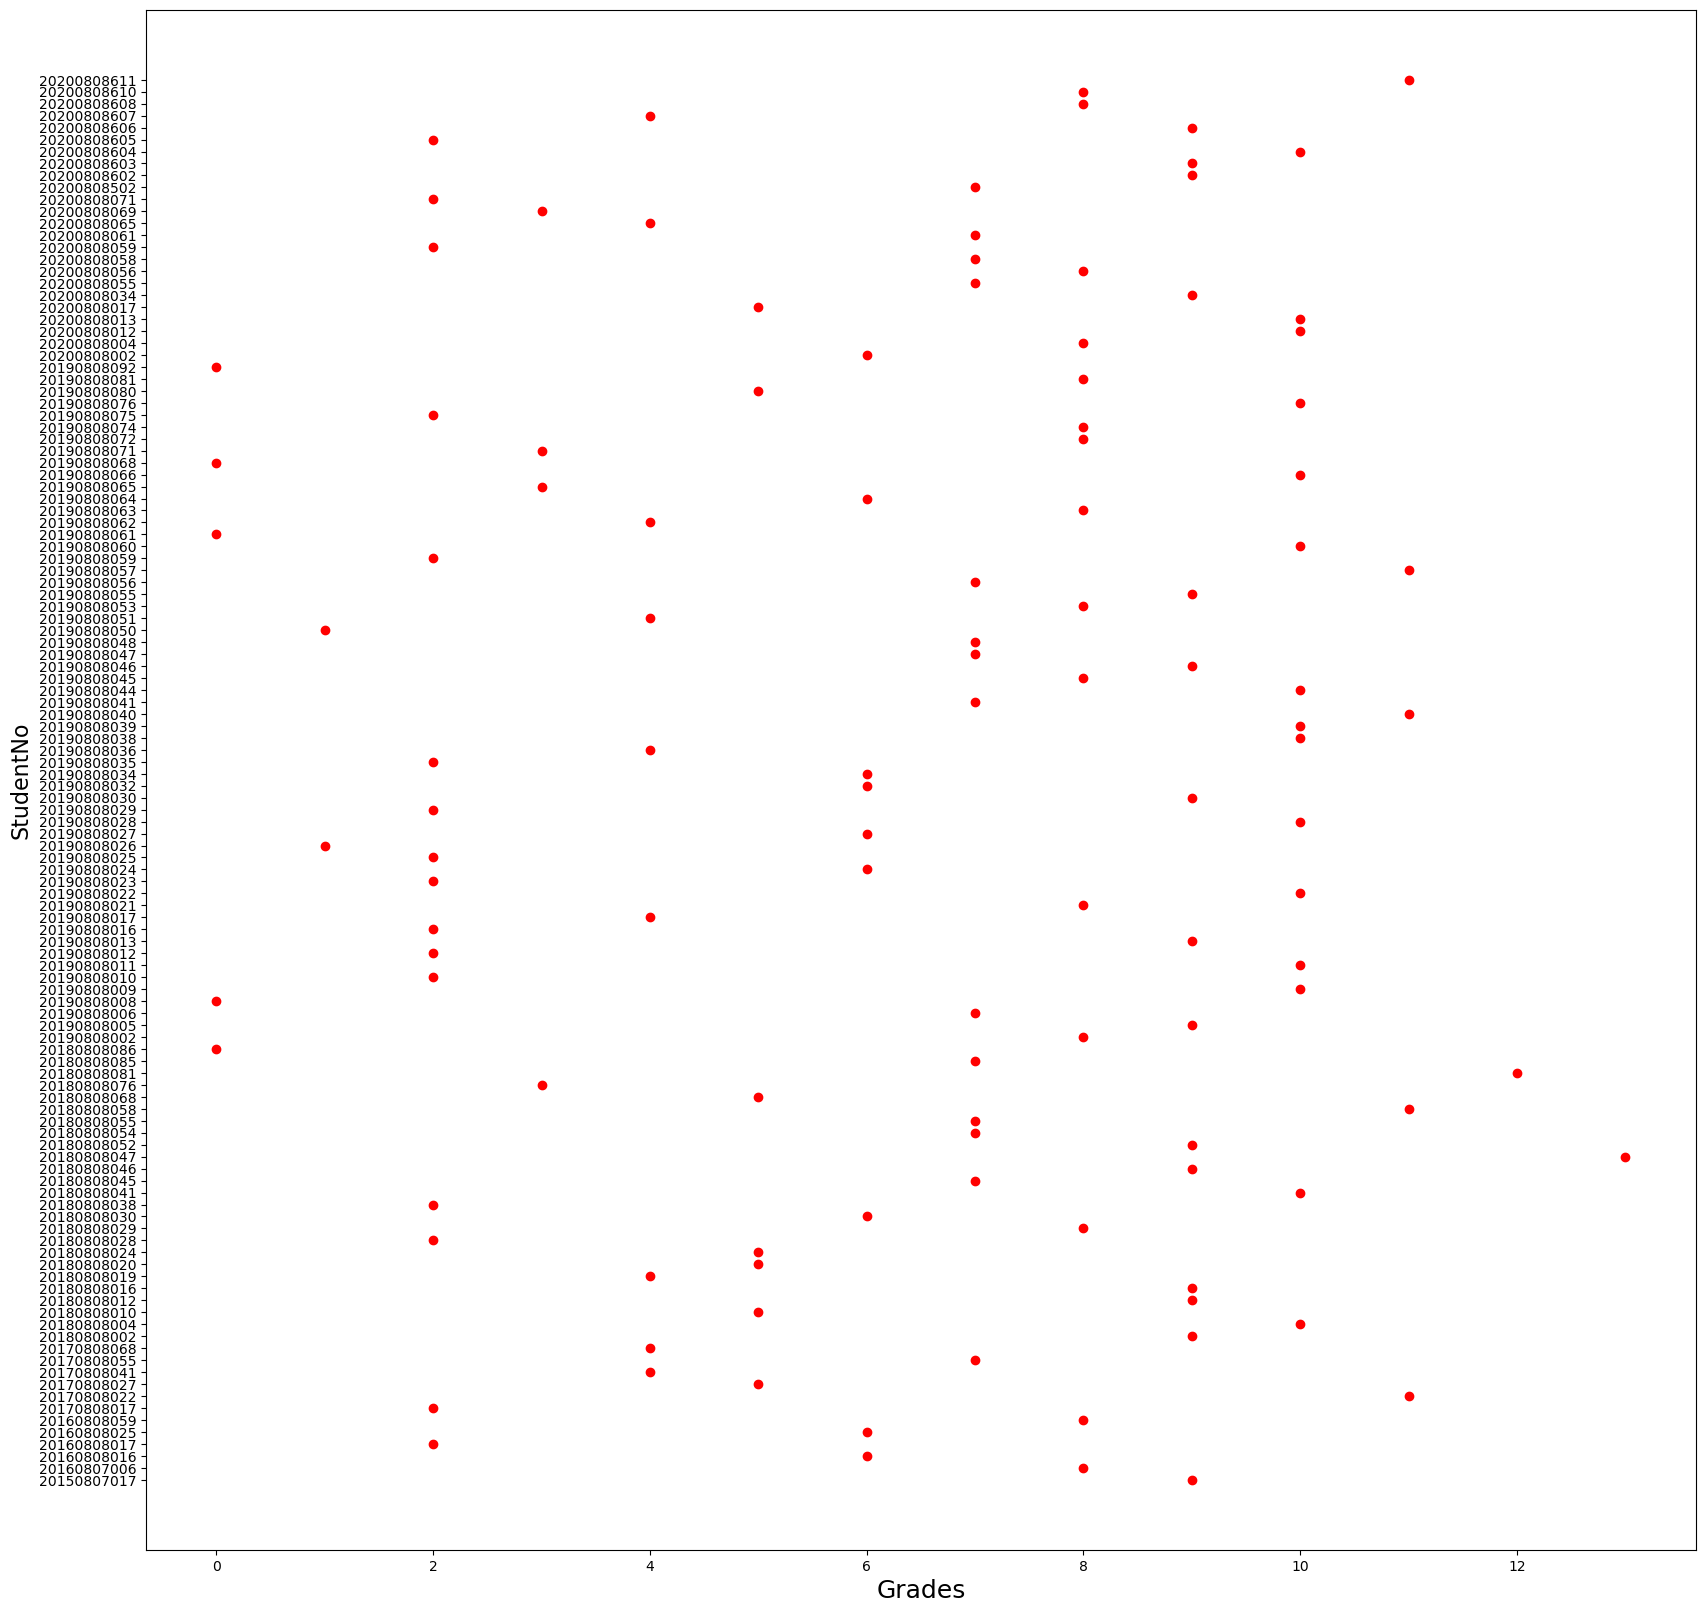

Number:    Encoder:    Original
20150807017 9 10
20160807006 8 10
20160808016 6 0
20160808017 2 0
20160808025 6 15
20160808059 8 10
20170808017 2 0
20170808022 11 10
20170808027 5 10
20170808041 4 15
20170808055 7 0
20170808068 4 0
20180808002 9 0
20180808004 10 10
20180808010 5 0
20180808012 9 15
20180808016 9 10
20180808019 4 0
20180808020 5 0
20180808024 5 0
20180808028 2 0
20180808029 8 10
20180808030 6 15
20180808038 2 0
20180808041 10 10
20180808045 7 10
20180808046 9 20
20180808047 13 20
20180808052 9 10
20180808054 7 15
20180808055 7 10
20180808058 11 10
20180808068 5 10
20180808076 3 10
20180808081 12 20
20180808085 7 0
20180808086 0 0
20190808002 8 0
20190808005 9 10
20190808006 7 0
20190808008 0 0
20190808009 10 10
20190808010 2 0
20190808011 10 0
20190808012 2 0
20190808013 9 0
20190808016 2 15
20190808017 4 10
20190808021 8 0
20190808022 10 10
20190808023 2 0
20190808024 6 0
20190808025 2 0
20190808026 1 0
20190808027 6 0
20190808028 10 0
20190808029 2 0
20190808030 9 0
20

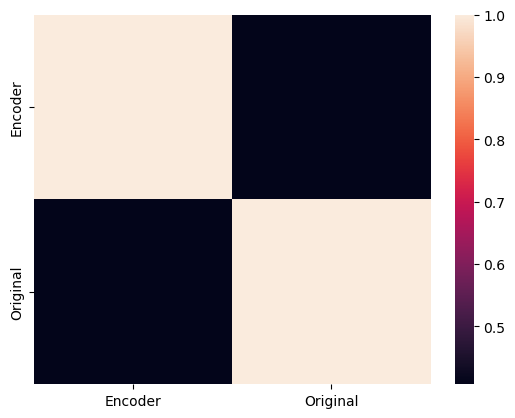

In [49]:
finalexamQ3 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q3')
finalexamQ3.fillna('', inplace=True)
finalexamQ3.head()
finalanswersQ3 = finalexamQ3.iloc[:,2].values.tolist()




finalsentence_embeddings3 = model(finalanswersQ3)
finalquery3 = "Entropy measures randomness or disorder. Information gain increases with the increase in order. It measures how unlikely an event occurs. It is related with the probability of an event not occuring by chance."
finalquery_vec3 = model([finalquery3])[0]
finaldata3=[]
for sent in finalanswersQ3:
  finalsim3 = cosine(finalquery_vec3, model([sent])[0])
  grade = finalsim3*20
  if grade<0:
    grade = 0
  finaldata3.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim3)

finalstudentno3 =finalexamQ3.iloc[:,0].values.tolist()
finalstno3 = []

for no in finalstudentno3:
  finalstno3.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata3, finalstno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades3 = finalexamQ3.iloc[:,3].values.tolist()
finalgradesdf3 = pd.DataFrame({'Encoder':finaldata3,'Original':finaloriginalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf3)) :
  print(finalstno3[i],finalgradesdf3.loc[i, "Encoder"], finalgradesdf3.loc[i, "Original"])

print(finalgradesdf3.corr())
sns.heatmap(finalgradesdf3.corr())
r2f3 = r2_score(finaloriginalgrades3,finaldata3)
print("R2: ",r2f3)

**Q4**

Sentence =  If we show north in out switch that would be enough to determine other directions. For determine where is north, we need to electromagnetise a thin metal such as needle and put it in a frictionless place so one side can show north pole and other, south pole. ; similarity =  0.25529104
Sentence =  zaman yetmedi ( ; similarity =  -0.024103675
Sentence =   ; similarity =  0.03572409
Sentence =    ; similarity =  0.03572409
Sentence =  We can connect the 2 switches by creating an electric magnetic field between them. ; similarity =  0.3813985
Sentence =   ; similarity =  0.03572409
Sentence =   ; similarity =  0.03572409
Sentence =  One switch will show north-south another one east west  and we can achieve the by using magnets. ; similarity =  0.37172335
Sentence =  I place a key between east and north from east, west, north and south directions, and a key between west and south and use the magnetic field that they apply to each other. ; similarity =  0.171721
Sentence =  With 

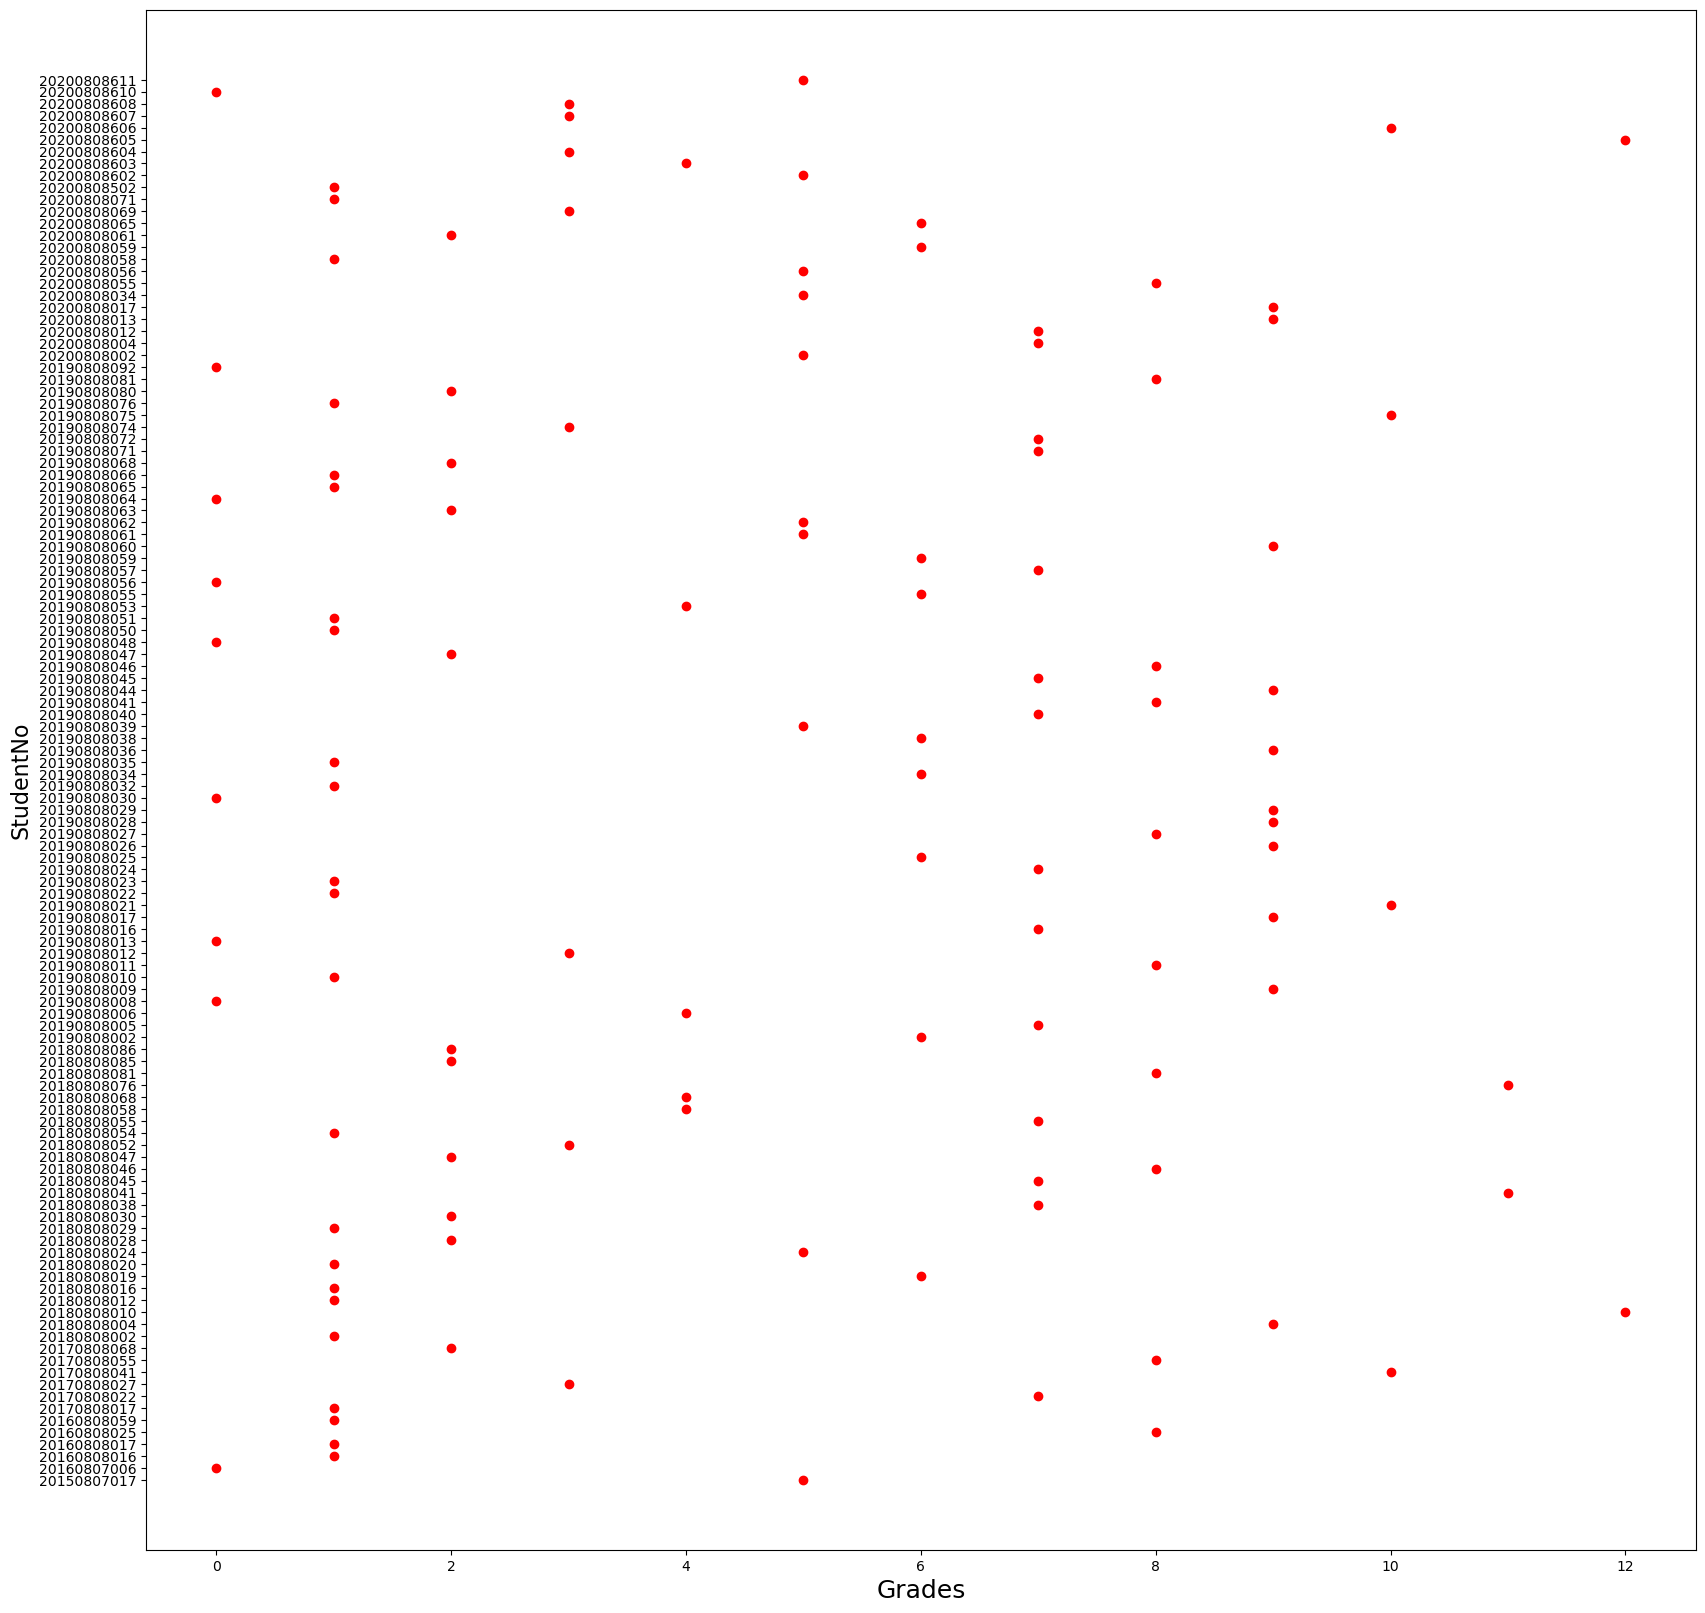

Number:    Encoder:    Original
20150807017 5 0
20160807006 0 0
20160808016 1 0
20160808017 1 0
20160808025 8 0
20160808059 1 0
20170808017 1 0
20170808022 7 0
20170808027 3 0
20170808041 10 20
20170808055 8 20
20170808068 2 10
20180808002 1 0
20180808004 9 10
20180808010 12 10
20180808012 1 0
20180808016 1 0
20180808019 6 10
20180808020 1 0
20180808024 5 0
20180808028 2 0
20180808029 1 0
20180808030 2 7
20180808038 7 10
20180808041 11 20
20180808045 7 10
20180808046 8 10
20180808047 2 0
20180808052 3 0
20180808054 1 0
20180808055 7 7
20180808058 4 0
20180808068 4 10
20180808076 11 10
20180808081 8 10
20180808085 2 10
20180808086 2 0
20190808002 6 10
20190808005 7 10
20190808006 4 10
20190808008 0 0
20190808009 9 0
20190808010 1 0
20190808011 8 10
20190808012 3 10
20190808013 0 7
20190808016 7 0
20190808017 9 10
20190808021 10 10
20190808022 1 0
20190808023 1 0
20190808024 7 0
20190808025 6 10
20190808026 9 10
20190808027 8 10
20190808028 9 10
20190808029 9 0
20190808030 0 0
2019080803

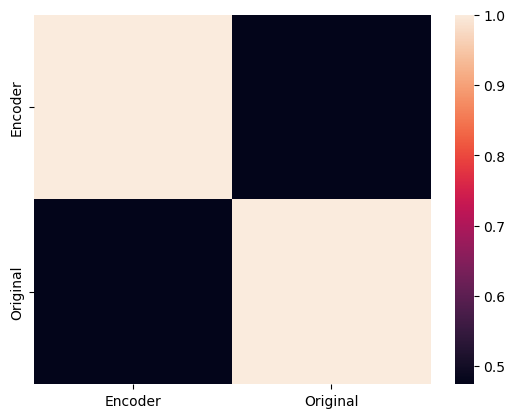

In [50]:
finalexamQ4 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q4')
finalexamQ4.fillna('', inplace=True)
finalexamQ4.head()
finalanswersQ4 = finalexamQ4.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings4 = model(finalanswersQ4)
finalquery4 = 'With two electrical switches, I can represent 4 situations by connecting those switches in parallel. I can turn on or off either switch and create 4 combinations of binary signal. These 4 combinations can map up to 4 different directions.'
finalquery_vec4 = model([finalquery4])[0]
finaldata4=[]
for sent in finalanswersQ4:
  finalsim4 = cosine(finalquery_vec4, model([sent])[0])
  grade = finalsim4*20
  if grade<0:
    grade = 0
  finaldata4.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim4)

finalstudentno4 =finalexamQ4.iloc[:,0].values.tolist()
finalstno4 = []

for no in finalstudentno4:
  finalstno4.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata4, finalstno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades4 = finalexamQ4.iloc[:,4].values.tolist()
finalgradesdf4 = pd.DataFrame({'Encoder':finaldata4,'Original':finaloriginalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf4)) :
  print(finalstno4[i],finalgradesdf4.loc[i, "Encoder"], finalgradesdf4.loc[i, "Original"])

print(finalgradesdf4.corr())
sns.heatmap(finalgradesdf4.corr())
r2f4 = r2_score(finaloriginalgrades4,finaldata4)
print("R2: ",r2f4)

**Q5**

Sentence =  It is developed with development and understanding of electricity. Started with Hauksbee's experiments, Volta's volta pile and led the development of Transistor. ; similarity =  0.48655957
Sentence =  Water was added to a cage, it was used like a battery, and the water was electrified, because the electricity was in the water, the surplus power began to accumulate there, thanks to the glass in between, the residual charges could not reach negative charges. But when we put our hand where the flow came, the loads were rising and a little spark came out ; similarity =  0.18746981
Sentence =   ; similarity =  -0.034313772
Sentence =    ; similarity =  -0.034313772
Sentence =  transistor made big impact for technology because it has lower power consumption and lower heat generation. with transistor complex circuits are minimized and with its benefits its been essential parts of circuits.  carbon rods, static electricity found,nions and cations found, stack battery found ...  ; s

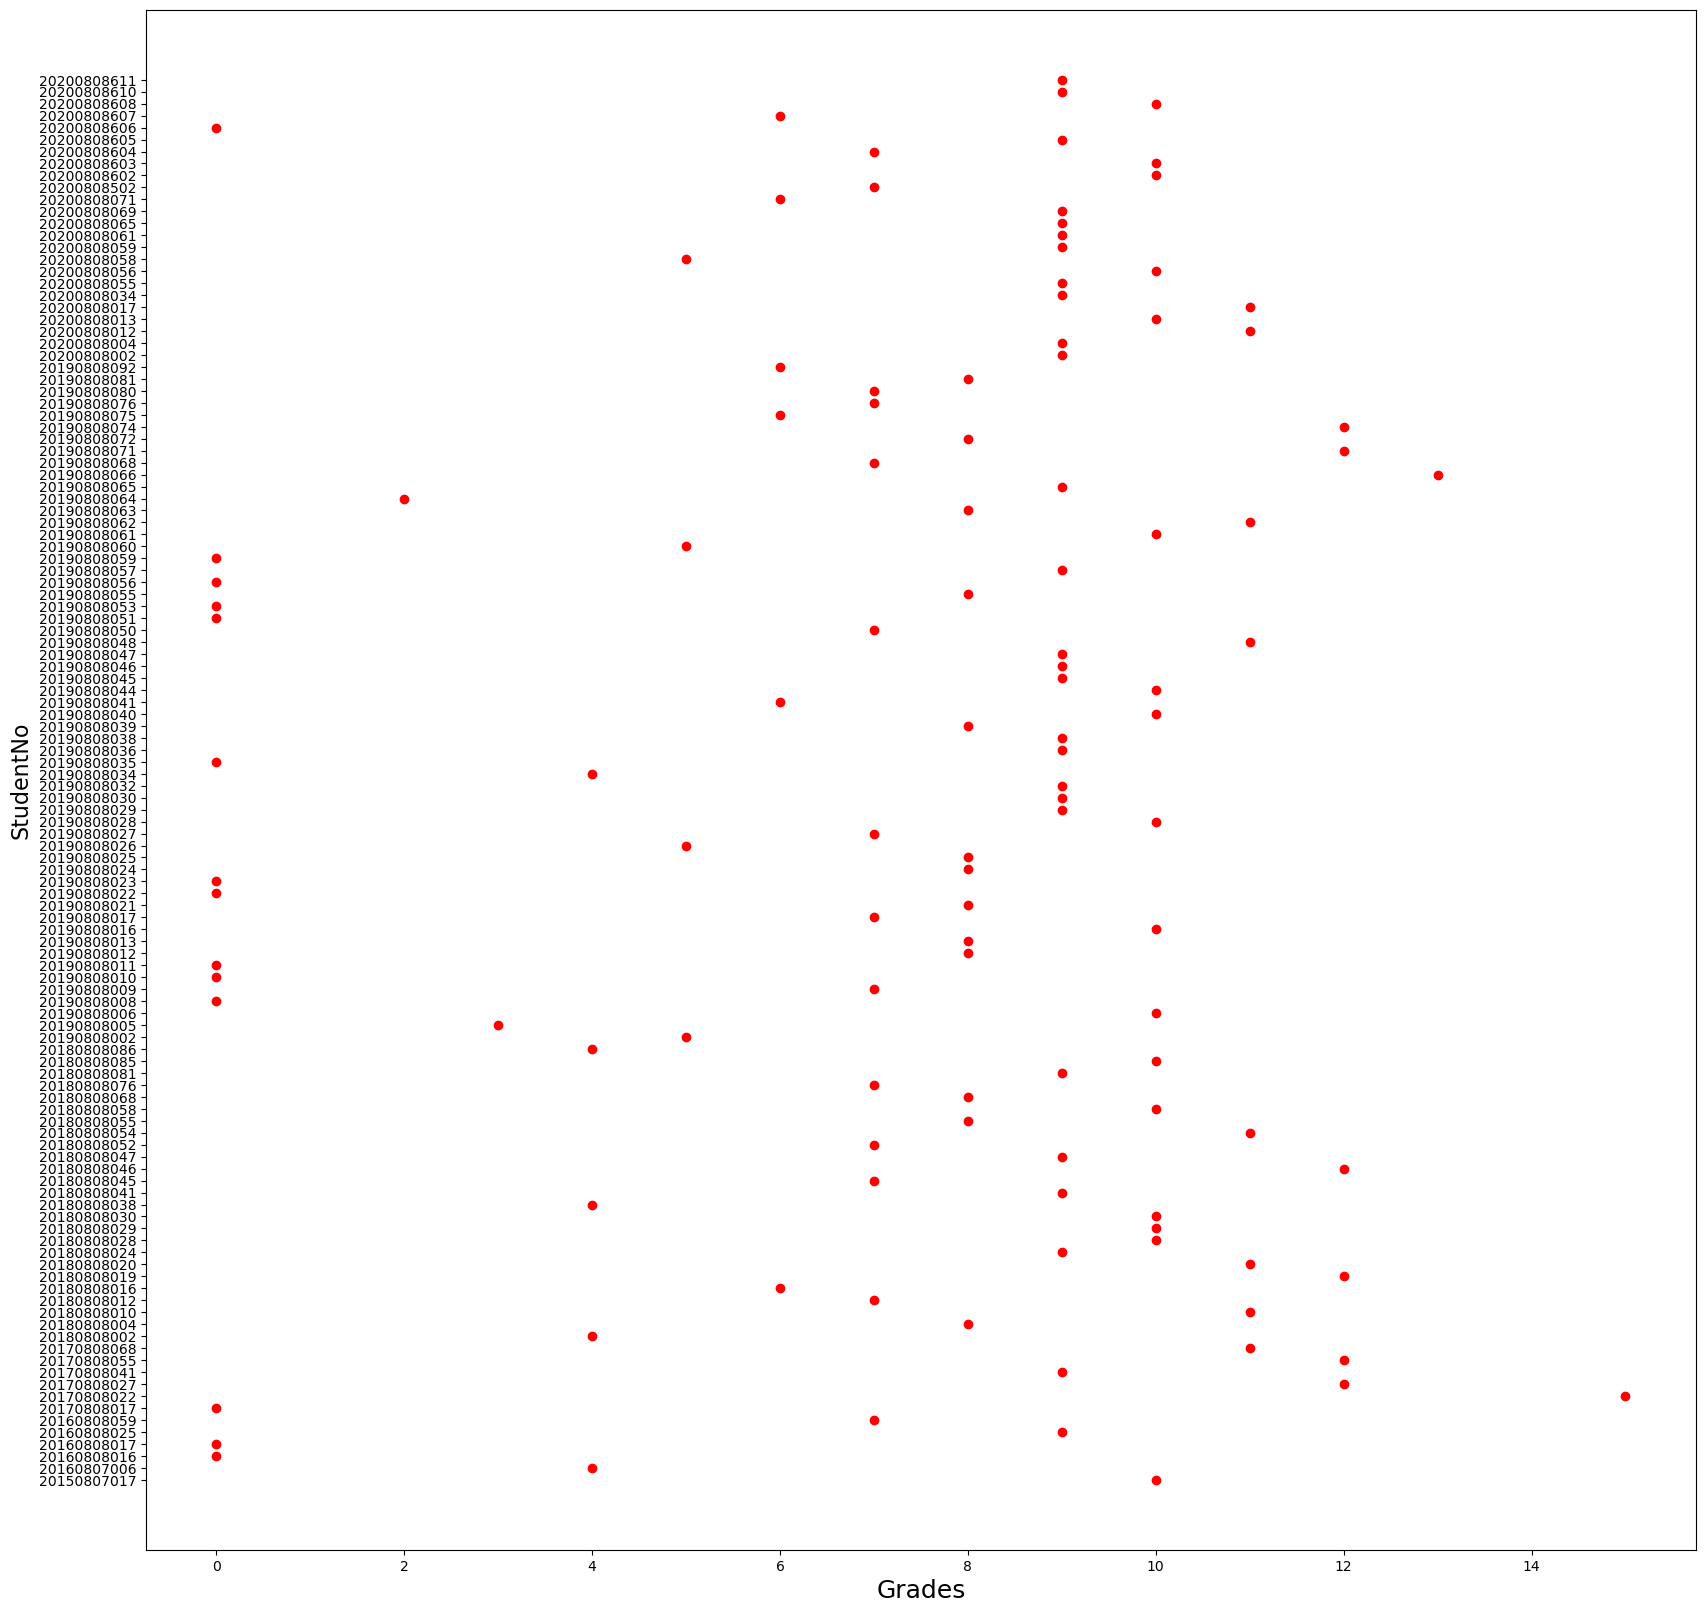

Number:    Encoder:    Original
20150807017 10 0
20160807006 4 0
20160808016 0 0
20160808017 0 0
20160808025 9 0
20160808059 7 0
20170808017 0 0
20170808022 15 20
20170808027 12 18
20170808041 9 16
20170808055 12 18
20170808068 11 20
20180808002 4 0
20180808004 8 8
20180808010 11 16
20180808012 7 8
20180808016 6 18
20180808019 12 10
20180808020 11 8
20180808024 9 8
20180808028 10 0
20180808029 10 16
20180808030 10 0
20180808038 4 8
20180808041 9 16
20180808045 7 0
20180808046 12 10
20180808047 9 16
20180808052 7 16
20180808054 11 8
20180808055 8 0
20180808058 10 0
20180808068 8 10
20180808076 7 16
20180808081 9 16
20180808085 10 18
20180808086 4 0
20190808002 5 8
20190808005 3 0
20190808006 10 18
20190808008 0 0
20190808009 7 8
20190808010 0 0
20190808011 0 0
20190808012 8 0
20190808013 8 8
20190808016 10 0
20190808017 7 8
20190808021 8 0
20190808022 0 0
20190808023 0 0
20190808024 8 16
20190808025 8 8
20190808026 5 0
20190808027 7 16
20190808028 10 8
20190808029 9 16
20190808030 9 0
2

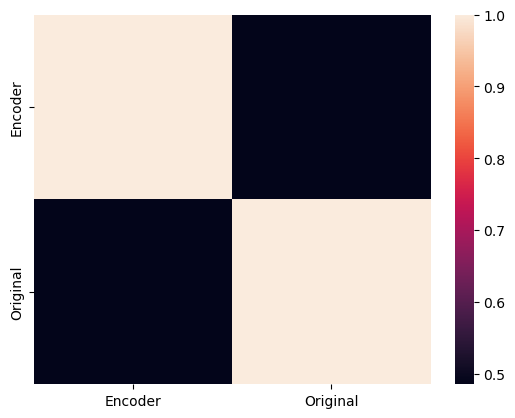

In [51]:
finalexamQ5 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q5')
finalexamQ5.fillna('', inplace=True)
finalexamQ5.head()
finalanswersQ5 = finalexamQ5.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings5 = model(finalanswersQ5)
finalquery5 = 'Everything started with the vacuum tubes. Diodes was the simplest of the vacuum tubes which allows transfer of electrons from cathode to anode.Then germanium transistors were developed as semiconductor. With the invention of silicon, silicon based transistors was developed.'
finalquery_vec5 = model([finalquery5])[0]
finaldata5=[]
for sent in finalanswersQ5:
  finalsim5 = cosine(finalquery_vec5, model([sent])[0])
  grade = finalsim5*20
  if grade<0:
    grade = 0
  finaldata5.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim5)

finalstudentno5 =finalexamQ5.iloc[:,0].values.tolist()
finalstno5 = []

for no in finalstudentno5:
  finalstno5.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata5, finalstno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades5 = finalexamQ5.iloc[:,3].values.tolist()
finalgradesdf5 = pd.DataFrame({'Encoder':finaldata5,'Original':finaloriginalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf5)) :
  print(finalstno5[i],finalgradesdf5.loc[i, "Encoder"], finalgradesdf5.loc[i, "Original"])

print(finalgradesdf5.corr())
sns.heatmap(finalgradesdf5.corr())
r2f5 = r2_score(finaloriginalgrades5,finaldata5)
print("R2: ",r2f5)